In [51]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from pprint import pprint

# Scaling + metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# LSTM (TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Technical indicators
import ta

# PyTorch for Transformer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# (Optional) For reproducibility
import random

In [50]:
# 2. DEFINE PROJECT PATHS
PROJECT_ROOT = Path(r"C:\Users\moham\Downloads\scrape\main\crypto_project")

DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"
MODEL_DIR = PROJECT_ROOT / "models"
OUTPUT_FIGS = PROJECT_ROOT / "outputs" / "figures"
OUTPUT_TABLES = PROJECT_ROOT / "outputs" / "tables"

# Create folders if not existing
MODEL_DIR.mkdir(exist_ok=True, parents=True)
OUTPUT_FIGS.mkdir(exist_ok=True, parents=True)
OUTPUT_TABLES.mkdir(exist_ok=True, parents=True)

# ETH_FILE = DATA_PROCESSED / "eth_cleaned.csv"
ETH_FILE = DATA_PROCESSED / "eth_cleaned_yf.csv"
NEWS_FILE = DATA_PROCESSED / "daily_news_aggregated.csv"



c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 64)             │        19,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,521 (76.25 KB)

 Trainable params: 19,521 (76.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.3128 - val_loss: 0.1517
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1739 - val_loss: 0.1041
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0899 - val_loss: 0.0908
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0523 - val_loss: 0.0630
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0499 - val_loss: 0.0601
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0469 - val_loss: 0.0504
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0462 - val_loss: 0.0464
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0425 - val_loss: 0.0443
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - val_loss: 0.0441
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0400 - val_loss: 0.0441
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - val_loss: 0.0599
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

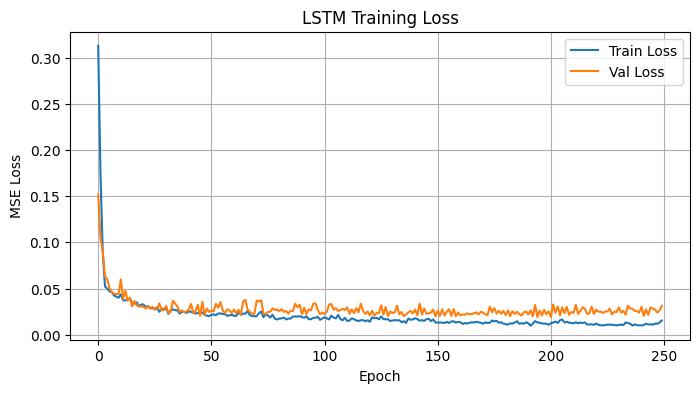

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
LSTM Results: RMSE=536.02, R2=0.7203


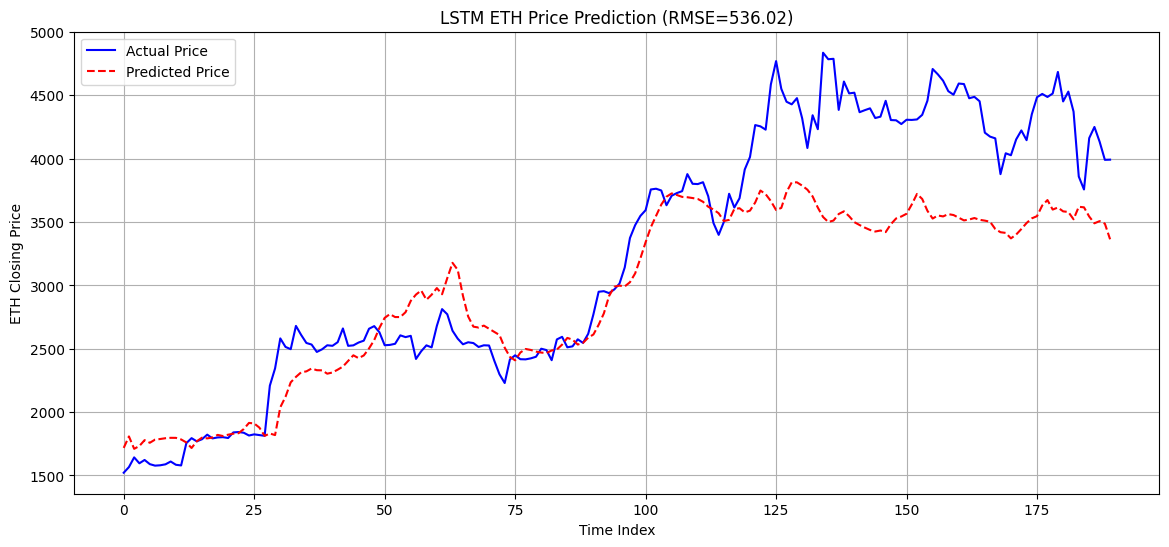

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

ETH Predictions (Today + Next 5 Days):

         Date  Predicted_ETH_Close
0  2025-12-08          3289.116211
1  2025-12-09          3289.116211
2  2025-12-10          3280.035889
3  2025-12-11          3316.641113
4  2025-12-12          3385.478516
5  2025-12-13          3427.070312


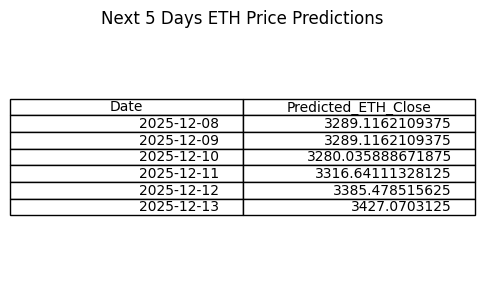

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


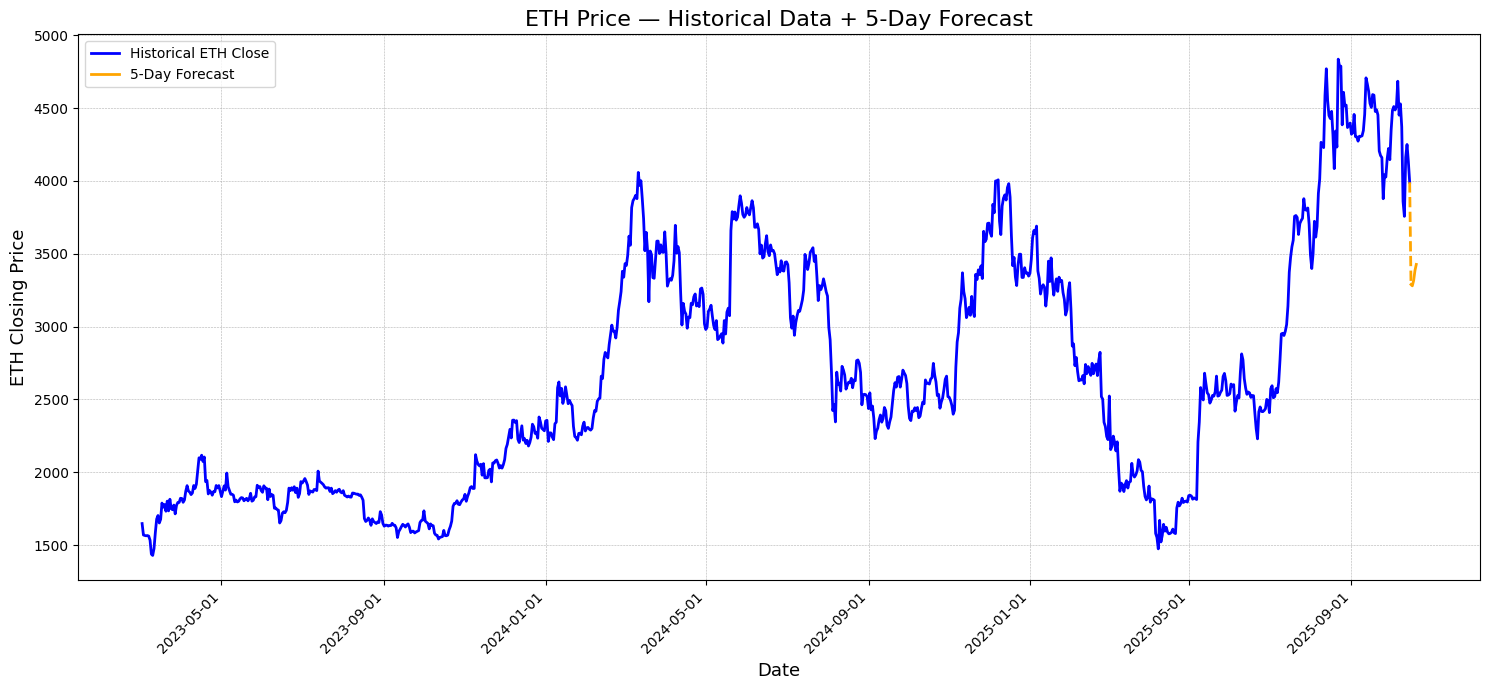

In [29]:
# ============================================================
# 3. LOAD DATA
# ============================================================
eth_df = pd.read_csv(ETH_FILE)
daily_news = pd.read_csv(NEWS_FILE)

eth_df["date"] = pd.to_datetime(eth_df["date"], errors="coerce")
daily_news["date"] = pd.to_datetime(daily_news["date"], errors="coerce")

# ============================================================
# 4. FILTER DATE RANGE
# ============================================================
start_date = pd.to_datetime("2023-01-12")
end_date   = pd.to_datetime("2025-10-16")

eth_df_filtered = eth_df[(eth_df["date"] >= start_date) & (eth_df["date"] <= end_date)].copy()
daily_news_filtered = daily_news[(daily_news["date"] >= start_date) & (daily_news["date"] <= end_date)].copy()

eth_df_filtered = eth_df_filtered.sort_values("date").reset_index(drop=True)
daily_news_filtered = daily_news_filtered.sort_values("date").reset_index(drop=True)

# ============================================================
# 5. MERGE ETH + NEWS
# ============================================================
eth_news_merged = pd.merge(
    eth_df_filtered,
    daily_news_filtered,
    on="date",
    how="left"
)

eth_news_merged["news_count"] = eth_news_merged["news_count"].fillna(0)
eth_news_merged["mean_sentiment"] = eth_news_merged["mean_sentiment"].fillna(0)

# ============================================================
# 6. COMPUTE TECHNICAL INDICATORS
# ============================================================
eth_news_merged["rsi"] = ta.momentum.RSIIndicator(close=eth_news_merged["eth_close"], window=14).rsi()

macd = ta.trend.MACD(close=eth_news_merged["eth_close"])
eth_news_merged["macd"] = macd.macd()
eth_news_merged["macd_signal"] = macd.macd_signal()
eth_news_merged["macd_diff"] = macd.macd_diff()

eth_news_merged["sma_20"] = eth_news_merged["eth_close"].rolling(window=20).mean()
eth_news_merged["sma_50"] = eth_news_merged["eth_close"].rolling(window=50).mean()

bb = ta.volatility.BollingerBands(close=eth_news_merged["eth_close"], window=20, window_dev=2)
eth_news_merged["bb_upper"] = bb.bollinger_hband()
eth_news_merged["bb_lower"] = bb.bollinger_lband()
eth_news_merged["bb_middle"] = bb.bollinger_mavg()

# ============================================================
# 7. TARGET VARIABLE
# ============================================================
eth_news_merged["target_next_close"] = eth_news_merged["eth_close"].shift(-1)
eth_news_merged = eth_news_merged.dropna().reset_index(drop=True)

# ============================================================
# 8. PREPARE FEATURES + SCALING
# ============================================================
features = [
    "rsi", "macd", "macd_signal", "macd_diff",
    "sma_20", "sma_50", "bb_upper", "bb_lower", "bb_middle",
    "news_count", "mean_sentiment"
]

X = eth_news_merged[features].values
y = eth_news_merged["target_next_close"].values.reshape(-1,1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# ============================================================
# 9. CREATE LSTM SEQUENCE DATA
# ============================================================
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i+time_steps)])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train/test split (80/20)
train_size = int(len(X_seq)*0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# ============================================================
# 10. BUILD LSTM MODEL
# ============================================================
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.summary()

# ============================================================
# 11. TRAIN MODEL
# ============================================================
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

# Plot training loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("LSTM Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.savefig(OUTPUT_FIGS / "lstm_training_loss.png")
plt.show()

# ============================================================
# 12. PREDICTION ON TEST SET
# ============================================================
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)
print(f"LSTM Results: RMSE={rmse:.2f}, R2={r2:.4f}")

# Plot Actual vs Predicted
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label="Actual Price", color="blue")
plt.plot(y_pred, label="Predicted Price", color="red", linestyle="--")
plt.title(f"LSTM ETH Price Prediction (RMSE={rmse:.2f})")
plt.xlabel("Time Index")
plt.ylabel("ETH Closing Price")
plt.legend()
plt.grid(True)
plt.savefig(OUTPUT_FIGS / "eth_actual_vs_predicted.png")
plt.show()

from datetime import datetime, timedelta

# ============================================================
# PREDICT NEXT 5 DAYS (INCLUDING TODAY)
# ============================================================

n_future_days = 5
future_preds = []
future_dates = []

seq = last_sequence.copy()

# --- TODAY'S PRICE (MODEL PREDICTION) ---
today_scaled = model.predict(seq.reshape(1, time_steps, X_scaled.shape[1]))
today_price = scaler_y.inverse_transform(today_scaled)[0, 0]

future_dates.append(datetime.today().date())
future_preds.append(today_price)

# --- NEXT 5 DAYS PREDICTION ---
for i in range(n_future_days):
    next_scaled = model.predict(seq.reshape(1, time_steps, X_scaled.shape[1]))
    next_price = scaler_y.inverse_transform(next_scaled)[0, 0]

    future_preds.append(next_price)
    future_dates.append((datetime.today() + timedelta(days=i+1)).date())

    # Update sequence
    next_row = seq[-1].copy()
    seq = np.vstack([seq[1:], next_row])

# Create DataFrame
pred_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_ETH_Close": future_preds
})

print("\nETH Predictions (Today + Next 5 Days):\n")
print(pred_df)



fig, ax = plt.subplots(figsize=(6, 2 + n_future_days * 0.25))
ax.axis('tight')
ax.axis('off')
ax.table(
    cellText=pred_df.values,
    colLabels=pred_df.columns,
    loc='center'
)
plt.title("Next 5 Days ETH Price Predictions")

plt.savefig(OUTPUT_TABLES / "eth_next_5_days_prediction_table.png")
plt.show()


# ============================================================
# 14. FUTURE PREDICTIONS (14 DAYS)
# ============================================================
n_days = 5
current_seq = last_sequence.copy()
pred_future_scaled = []

for _ in range(n_days):
    next_pred_scaled = model.predict(current_seq.reshape(1, time_steps, X_scaled.shape[1]))
    pred_future_scaled.append(next_pred_scaled[0, 0])
    next_row = current_seq[-1].copy()
    current_seq = np.vstack((current_seq[1:], next_row))

pred_future = scaler_y.inverse_transform(np.array(pred_future_scaled).reshape(-1, 1))

# Future dates starting next day
future_dates = pd.date_range(
    start=eth_news_merged["date"].iloc[-1] + pd.Timedelta(days=1),
    periods=n_days
)

plt.figure(figsize=(15, 7))

# Historical line
plt.plot(
    eth_news_merged["date"],
    eth_news_merged["eth_close"],
    label="Historical ETH Close",
    linewidth=2,
    color="blue"
)

# Forecast line
plt.plot(
    future_dates,
    pred_future,
    label=f"{n_days}-Day Forecast",
    linewidth=2,
    color="orange"
)

# --- CONNECT LAST HISTORICAL POINT TO FIRST FORECAST POINT ---
plt.plot(
    [eth_news_merged["date"].iloc[-1], future_dates[0]],
    [eth_news_merged["eth_close"].iloc[-1], pred_future[0][0]],
    color="orange",
    linestyle="--",
    linewidth=2
)

# DAILY GRID
plt.grid(which='major', linestyle='--', linewidth=0.4)


plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45, ha='right')

plt.title(f"ETH Price — Historical Data + {n_days}-Day Forecast", fontsize=16)
plt.xlabel("Date", fontsize=13)
plt.ylabel("ETH Closing Price", fontsize=13)
plt.legend()

plt.tight_layout()
plt.savefig(OUTPUT_FIGS / "eth_historical_forecast_daily_grid.png")
plt.show()


Epoch 1/100


c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.1576 - val_loss: 0.1640 - learning_rate: 0.0010
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0778 - val_loss: 0.0520 - learning_rate: 0.0010
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0553 - val_loss: 0.0417 - learning_rate: 0.0010
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0650 - val_loss: 0.0322 - learning_rate: 0.0010
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0889 - val_loss: 0.0567 - learning_rate: 0.0010
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0495 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0385 - val_loss: 0.0354 - learning_rate: 0.0010
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0388 - val_loss: 0.0678 - learning_rate: 0.0010
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0393 - val_loss: 0.0801 - learning_rate: 0.0010
Epoch 10/100
42/42 ━━━

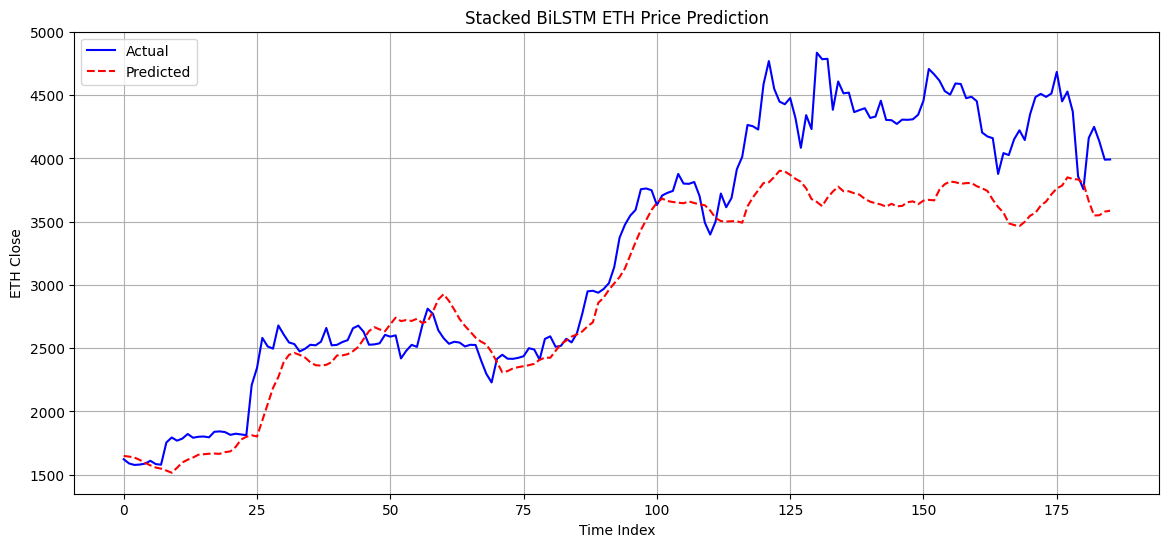

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
         Date  Predicted_ETH_Close
0  2025-12-08          3571.431885
1  2025-12-09          3571.431885
2  2025-12-10          3562.474854
3  2025-12-11          3555.938721
4  2025-12-12          3550.930420
5  2025-12-13          3546.860840


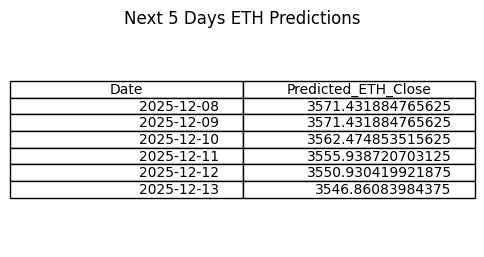

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


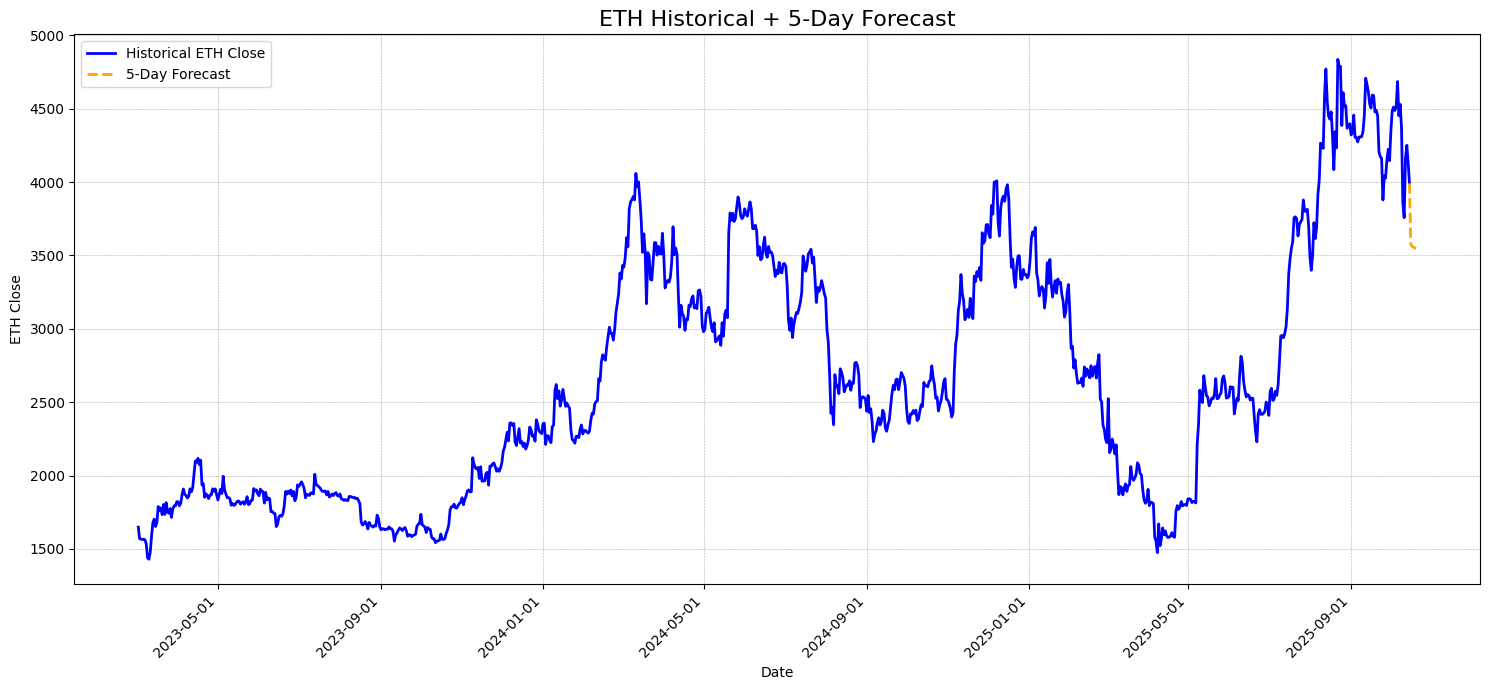

In [33]:
# ============================================================
# 2. LOAD DATA
# ============================================================
eth_df = pd.read_csv(ETH_FILE)
daily_news = pd.read_csv(NEWS_FILE)
eth_df["date"] = pd.to_datetime(eth_df["date"], errors="coerce")
daily_news["date"] = pd.to_datetime(daily_news["date"], errors="coerce")

# ============================================================
# 3. FILTER DATES
# ============================================================
start_date = pd.to_datetime("2023-01-12")
end_date = pd.to_datetime("2025-10-16")
eth_df = eth_df[(eth_df["date"] >= start_date) & (eth_df["date"] <= end_date)]
daily_news = daily_news[(daily_news["date"] >= start_date) & (daily_news["date"] <= end_date)]
eth_df = eth_df.sort_values("date").reset_index(drop=True)
daily_news = daily_news.sort_values("date").reset_index(drop=True)

# ============================================================
# 4. MERGE ETH + NEWS
# ============================================================
eth_news = pd.merge(eth_df, daily_news, on="date", how="left")
eth_news["news_count"] = eth_news["news_count"].fillna(0)
eth_news["mean_sentiment"] = eth_news["mean_sentiment"].fillna(0)

# ============================================================
# 5. COMPUTE TECHNICAL INDICATORS
# ============================================================
eth_news["rsi"] = ta.momentum.RSIIndicator(eth_news["eth_close"], window=14).rsi()
macd = ta.trend.MACD(eth_news["eth_close"])
eth_news["macd"] = macd.macd()
eth_news["macd_signal"] = macd.macd_signal()
eth_news["macd_diff"] = macd.macd_diff()
eth_news["sma_20"] = eth_news["eth_close"].rolling(20).mean()
eth_news["sma_50"] = eth_news["eth_close"].rolling(50).mean()
bb = ta.volatility.BollingerBands(eth_news["eth_close"], window=20, window_dev=2)
eth_news["bb_upper"] = bb.bollinger_hband()
eth_news["bb_lower"] = bb.bollinger_lband()
eth_news["bb_middle"] = bb.bollinger_mavg()

# ============================================================
# 6. TARGET
# ============================================================
eth_news["target_next_close"] = eth_news["eth_close"].shift(-1)
eth_news = eth_news.dropna().reset_index(drop=True)

# ============================================================
# 7. FEATURES + SCALING
# ============================================================
features = ["rsi","macd","macd_signal","macd_diff","sma_20","sma_50",
            "bb_upper","bb_lower","bb_middle","news_count","mean_sentiment"]
X = eth_news[features].values
y = eth_news["target_next_close"].values.reshape(-1,1)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# ============================================================
# 8. CREATE SEQUENCES
# ============================================================
def create_sequences(X, y, time_steps=30):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 30
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train/test split
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# ============================================================
# 9. STACKED BIDIRECTIONAL LSTM MODEL
# ============================================================
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(time_steps, X_train.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse")
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    shuffle=False,
    callbacks=[early_stop, reduce_lr]
)

# ============================================================
# 10. TEST SET PREDICTION
# ============================================================
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)
print(f"Stacked BiLSTM RMSE={rmse:.2f}, R2={r2:.4f}")

plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="red", linestyle="--")
plt.title("Stacked BiLSTM ETH Price Prediction")
plt.xlabel("Time Index")
plt.ylabel("ETH Close")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# 11. NEXT 5-DAY PREDICTION (INCL. TODAY)
# ============================================================
n_future_days = 5
seq = X_scaled[-time_steps:].copy()
future_preds = []

# Predict today
today_price = scaler_y.inverse_transform(model.predict(seq.reshape(1,time_steps,X_scaled.shape[1])))[0,0]
future_preds.append(today_price)

# Predict next 5 days
for i in range(n_future_days):
    next_scaled = model.predict(seq.reshape(1,time_steps,X_scaled.shape[1]))
    next_price = scaler_y.inverse_transform(next_scaled)[0,0]
    future_preds.append(next_price)
    seq = np.vstack([seq[1:], seq[-1]])

future_dates = [datetime.today().date() + timedelta(days=i) for i in range(n_future_days+1)]
pred_df = pd.DataFrame({"Date": future_dates, "Predicted_ETH_Close": future_preds})
print(pred_df)

# Table
fig, ax = plt.subplots(figsize=(6, 1 + len(pred_df)*0.3))
ax.axis('off')
ax.table(cellText=pred_df.values, colLabels=pred_df.columns, loc='center')
plt.title("Next 5 Days ETH Predictions")
plt.savefig(OUTPUT_TABLES / "eth_next_5_days_prediction_table.png")
plt.show()

# ============================================================
# 12. PLOT HISTORICAL + FUTURE FORECAST
# ============================================================
future_seq = X_scaled[-time_steps:].copy()
pred_future_scaled = []

for _ in range(n_future_days):
    next_pred_scaled = model.predict(future_seq.reshape(1,time_steps,X_scaled.shape[1]))
    pred_future_scaled.append(next_pred_scaled[0,0])
    future_seq = np.vstack([future_seq[1:], future_seq[-1]])

pred_future = scaler_y.inverse_transform(np.array(pred_future_scaled).reshape(-1,1))
future_dates_plot = pd.date_range(start=eth_news["date"].iloc[-1]+pd.Timedelta(days=1), periods=n_future_days)

plt.figure(figsize=(15,7))
plt.plot(eth_news["date"], eth_news["eth_close"], color="blue", label="Historical ETH Close", linewidth=2)
plt.plot(future_dates_plot, pred_future, color="orange", linestyle="--", linewidth=2, label="5-Day Forecast")
plt.plot([eth_news["date"].iloc[-1], future_dates_plot[0]],
         [eth_news["eth_close"].iloc[-1], pred_future[0][0]], color="orange", linestyle="--", linewidth=2)

plt.grid(which='major', linestyle='--', linewidth=0.4)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')
plt.title("ETH Historical + 5-Day Forecast", fontsize=16)
plt.xlabel("Date")
plt.ylabel("ETH Close")
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_FIGS / "eth_historical_forecast.png")
plt.show()

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


Done: time_steps=10, units=32, dropout=0.1, batch=8, epochs=50, lr=0.01 | RMSE=565.30, R2=0.6889
   time_steps  lstm_units  dropout  batch_size  epochs  learning_rate  \
0          10          32      0.1           8      50           0.01   

         RMSE        R2  
0  565.302042  0.688856  
Best model saved as best_lstm_model.h5


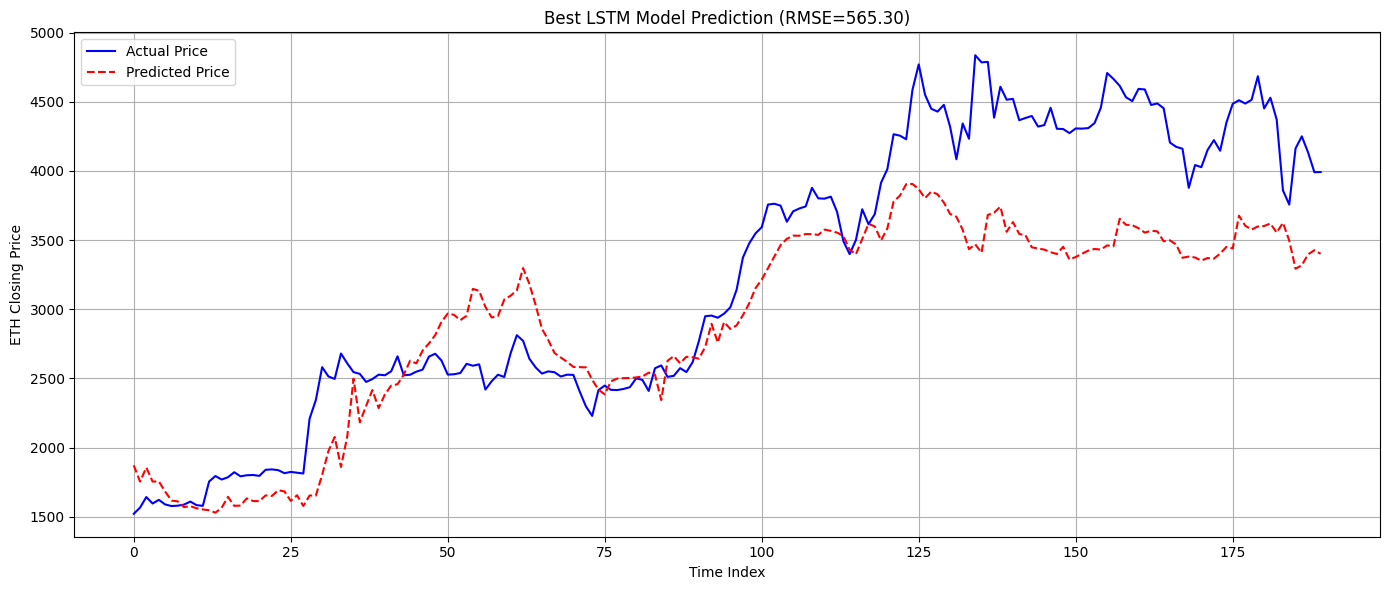

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Next 5 Days ETH Predictions:

         Date  Predicted_ETH_Close
0  2025-12-08          3382.627441
1  2025-12-09          3382.627441
2  2025-12-10          3398.973145
3  2025-12-11          3392.132324
4  2025-12-12          3402.988281
5  2025-12-13          3436.888672


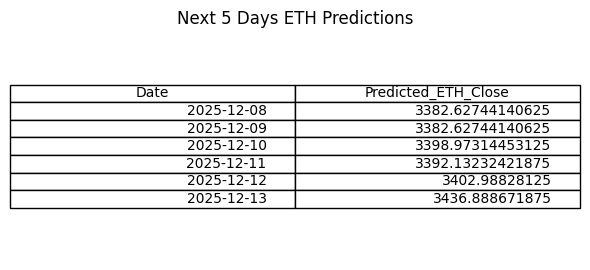

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


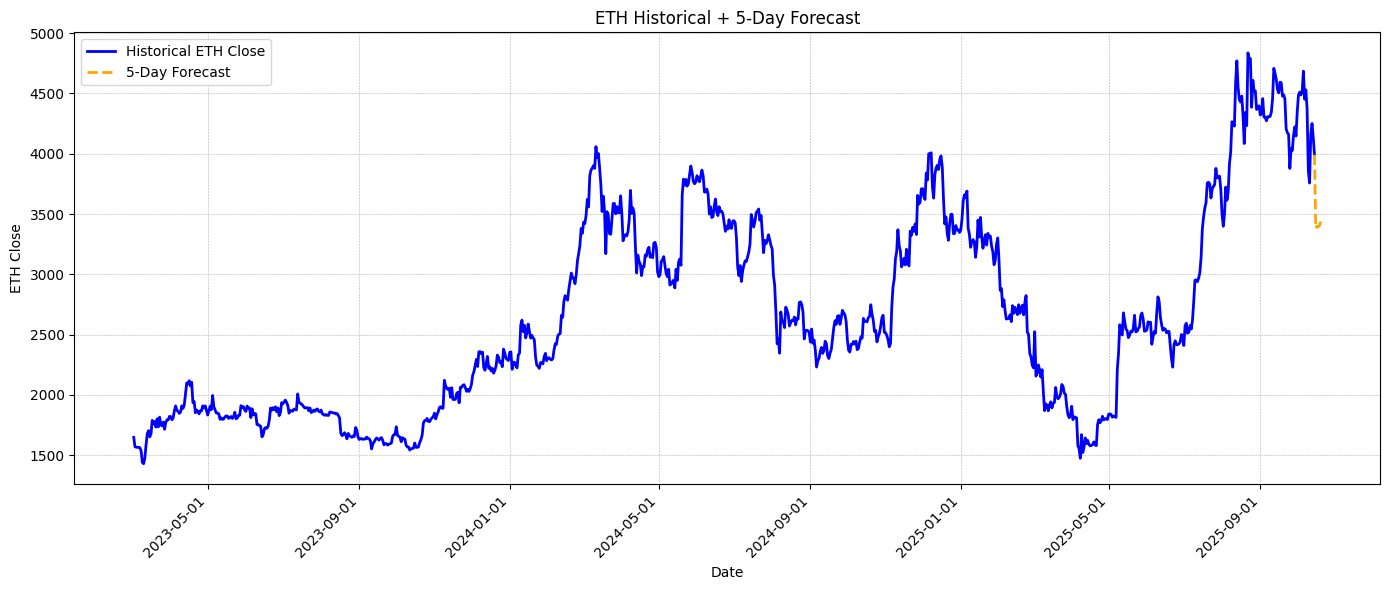

In [38]:



# 2. LOAD DATA
eth_df = pd.read_csv(ETH_FILE)
daily_news = pd.read_csv(NEWS_FILE)

eth_df["date"] = pd.to_datetime(eth_df["date"], errors="coerce")
daily_news["date"] = pd.to_datetime(daily_news["date"], errors="coerce")

start_date = pd.to_datetime("2023-01-12")
end_date = pd.to_datetime("2025-10-16")

eth_df = eth_df[(eth_df["date"] >= start_date) & (eth_df["date"] <= end_date)].copy()
daily_news = daily_news[(daily_news["date"] >= start_date) & (daily_news["date"] <= end_date)].copy()

eth_df = eth_df.sort_values("date").reset_index(drop=True)
daily_news = daily_news.sort_values("date").reset_index(drop=True)

# Merge
df = pd.merge(eth_df, daily_news, on="date", how="left")
df["news_count"] = df["news_count"].fillna(0)
df["mean_sentiment"] = df["mean_sentiment"].fillna(0)


# 3. TECHNICAL INDICATORS
df["rsi"] = ta.momentum.RSIIndicator(close=df["eth_close"], window=14).rsi()
macd = ta.trend.MACD(close=df["eth_close"])
df["macd"] = macd.macd()
df["macd_signal"] = macd.macd_signal()
df["macd_diff"] = macd.macd_diff()
df["sma_20"] = df["eth_close"].rolling(20).mean()
df["sma_50"] = df["eth_close"].rolling(50).mean()
bb = ta.volatility.BollingerBands(close=df["eth_close"], window=20, window_dev=2)
df["bb_upper"] = bb.bollinger_hband()
df["bb_lower"] = bb.bollinger_lband()
df["bb_middle"] = bb.bollinger_mavg()

df["target_next_close"] = df["eth_close"].shift(-1)
df = df.dropna().reset_index(drop=True)


# 4. FEATURES + SCALING
features = ["rsi","macd","macd_signal","macd_diff","sma_20","sma_50",
            "bb_upper","bb_lower","bb_middle","news_count","mean_sentiment"]

X = df[features].values
y = df["target_next_close"].values.reshape(-1,1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)


# 5. FUNCTION TO CREATE SEQUENCES
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)


# 6. HYPERPARAMETER OPTIONS
#time_steps_list = [10, 20, 30]
#lstm_units_list = [32, 64, 128]
#dropout_list = [0.1, 0.2, 0.3]
#batch_size_list = [16, 32]
#epochs_list = [50, 100]
#learning_rate_list = [0.001, 0.0005]

# Test parameters
time_steps_list = [10]
lstm_units_list = [32]
dropout_list = [0.1]
batch_size_list = [8]
epochs_list = [50]
learning_rate_list = [0.01]


# 7. LOOP THROUGH HYPERPARAMETERS
results = []
best_rmse = float("inf")
best_model = None
best_X_test, best_y_test, best_y_pred = None, None, None

for time_steps in time_steps_list:
    X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)
    train_size = int(len(X_seq)*0.8)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]
    
    for lstm_units in lstm_units_list:
        for dropout_rate in dropout_list:
            for batch_size in batch_size_list:
                for epochs in epochs_list:
                    for lr in learning_rate_list:
                        # Build model
                        model = Sequential()
                        model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
                        model.add(Dropout(dropout_rate))
                        model.add(Dense(1))
                        model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
                        
                        # Train model
                        history = model.fit(
                            X_train, y_train,
                            validation_split=0.1,
                            epochs=epochs,
                            batch_size=batch_size,
                            verbose=0,
                            shuffle=False
                        )
                        
                        # Predict
                        y_pred_scaled = model.predict(X_test)
                        y_pred = scaler_y.inverse_transform(y_pred_scaled)
                        y_test_actual = scaler_y.inverse_transform(y_test)
                        
                        rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
                        r2 = r2_score(y_test_actual, y_pred)
                        
                        # Store results
                        results.append({
                            "time_steps": time_steps,
                            "lstm_units": lstm_units,
                            "dropout": dropout_rate,
                            "batch_size": batch_size,
                            "epochs": epochs,
                            "learning_rate": lr,
                            "RMSE": rmse,
                            "R2": r2
                        })
                        
                        print(f"Done: time_steps={time_steps}, units={lstm_units}, dropout={dropout_rate}, batch={batch_size}, epochs={epochs}, lr={lr} | RMSE={rmse:.2f}, R2={r2:.4f}")

                        # Update best model
                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_model = model
                            best_X_test = X_test
                            best_y_test = y_test_actual
                            best_y_pred = y_pred


# 8. RESULTS DATAFRAME
results_df = pd.DataFrame(results)
print(results_df.sort_values("RMSE").head(10))


# 9. SAVE BEST MODEL
best_model.save(MODEL_DIR / "best_lstm_model.h5")
print("Best model saved as best_lstm_model.h5")


# 10. PLOT BEST MODEL PREDICTION
plt.figure(figsize=(14,6))
plt.plot(best_y_test, label="Actual Price", color="blue")
plt.plot(best_y_pred, label="Predicted Price", color="red", linestyle="--")
plt.title(f"Best LSTM Model Prediction (RMSE={best_rmse:.2f})")
plt.xlabel("Time Index")
plt.ylabel("ETH Closing Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(OUTPUT_FIGS / "best_model_prediction.png")
plt.show()


# 11. NEXT 5 DAYS PREDICTION (INCLUDING TODAY)
n_future_days = 5
last_sequence = X_scaled[-time_steps_list[0]:].copy()
future_preds = []

# Predict today
today_price = scaler_y.inverse_transform(best_model.predict(last_sequence.reshape(1,time_steps_list[0],X_scaled.shape[1])))[0,0]
future_preds.append(today_price)

# Predict next 5 days
seq = last_sequence.copy()
for i in range(n_future_days):
    next_scaled = best_model.predict(seq.reshape(1,time_steps_list[0],X_scaled.shape[1]))
    next_price = scaler_y.inverse_transform(next_scaled)[0,0]
    future_preds.append(next_price)
    seq = np.vstack([seq[1:], seq[-1]])

future_dates = [datetime.today().date() + timedelta(days=i) for i in range(n_future_days+1)]
pred_df = pd.DataFrame({"Date": future_dates, "Predicted_ETH_Close": future_preds})
print("\nNext 5 Days ETH Predictions:\n")
print(pred_df)
pred_df.to_csv(OUTPUT_TABLES / "next_5_days_eth_predictions.csv", index=False)


# 12. PLOT TABLE
fig, ax = plt.subplots(figsize=(6, 1 + len(pred_df)*0.3))
ax.axis('off')
ax.table(cellText=pred_df.values, colLabels=pred_df.columns, loc='center')
plt.title("Next 5 Days ETH Predictions")
plt.tight_layout()
plt.savefig(OUTPUT_FIGS / "next_5_days_table.png")
plt.show()


# 13. PLOT HISTORICAL + FUTURE FORECAST
future_seq = X_scaled[-time_steps_list[0]:].copy()
pred_future_scaled = []

for _ in range(n_future_days):
    next_pred_scaled = best_model.predict(future_seq.reshape(1,time_steps_list[0],X_scaled.shape[1]))
    pred_future_scaled.append(next_pred_scaled[0,0])
    future_seq = np.vstack([future_seq[1:], future_seq[-1]])

pred_future = scaler_y.inverse_transform(np.array(pred_future_scaled).reshape(-1,1))
future_dates_plot = pd.date_range(start=df["date"].iloc[-1]+pd.Timedelta(days=1), periods=n_future_days)

plt.figure(figsize=(14,6))
plt.plot(df["date"], df["eth_close"], color="blue", label="Historical ETH Close", linewidth=2)
plt.plot(future_dates_plot, pred_future, color="orange", linestyle="--", linewidth=2, label="5-Day Forecast")
plt.plot([df["date"].iloc[-1], future_dates_plot[0]],
         [df["eth_close"].iloc[-1], pred_future[0][0]], color="orange", linestyle="--", linewidth=2)

plt.grid(which='major', linestyle='--', linewidth=0.4)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')
plt.title("ETH Historical + 5-Day Forecast")
plt.xlabel("Date")
plt.ylabel("ETH Close")
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_FIGS / "historical_plus_5day_forecast.png")
plt.show()

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Done: time_steps=10, units=32, dropout=0.1, batch=8, epochs=50, lr=0.01 | RMSE=614.32, R2=0.6326


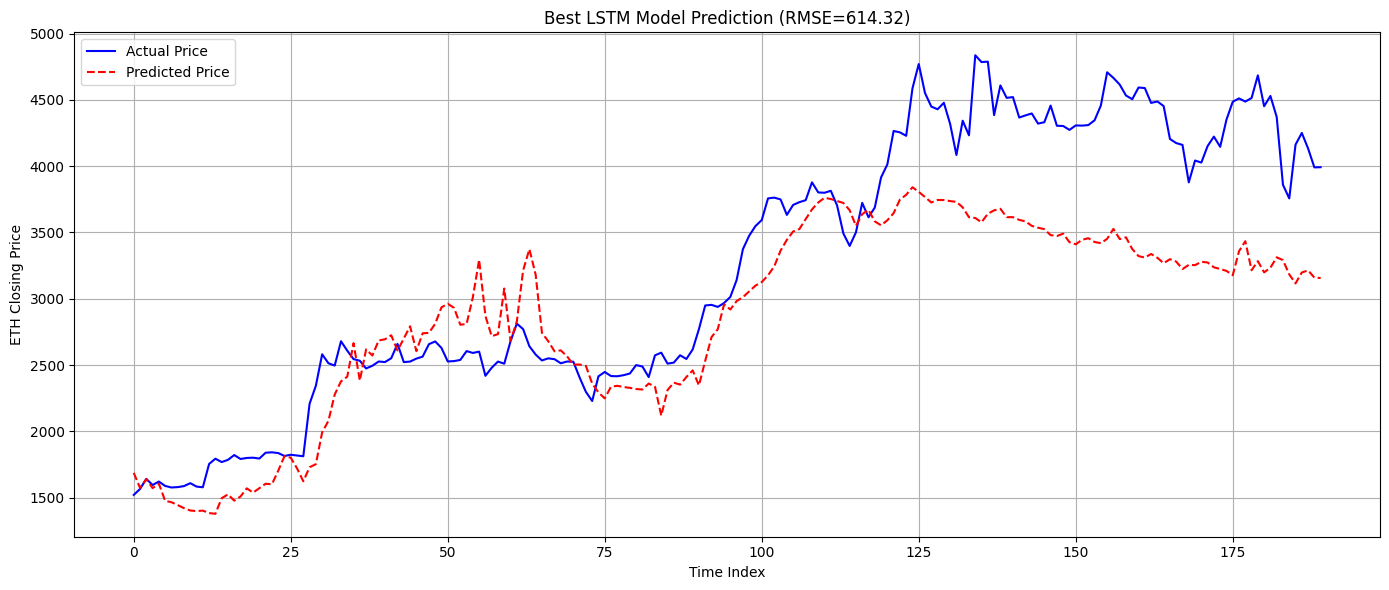

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


C:\Users\moham\AppData\Local\Temp\ipykernel_41092\4283651660.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = next_scaled  # replace eth_close feature with predicted scaled value
C:\Users\moham\AppData\Local\Temp\ipykernel_41092\4283651660.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = next_scaled  # replace eth_close feature with predicted scaled value
C:\Users\moham\AppData\Local\Temp\ipykernel_41092\4283651660.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing thi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Next 5 Days ETH Predictions:

         Date  Predicted_ETH_Close
0  2025-12-08          3161.968018
1  2025-12-09          3187.885010
2  2025-12-10          3110.182617
3  2025-12-11          3124.860596
4  2025-12-12          3115.000488
5  2025-12-13          3104.916016


C:\Users\moham\AppData\Local\Temp\ipykernel_41092\4283651660.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = next_scaled  # replace eth_close feature with predicted scaled value
C:\Users\moham\AppData\Local\Temp\ipykernel_41092\4283651660.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = next_scaled  # replace eth_close feature with predicted scaled value
C:\Users\moham\AppData\Local\Temp\ipykernel_41092\4283651660.py:166: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing thi

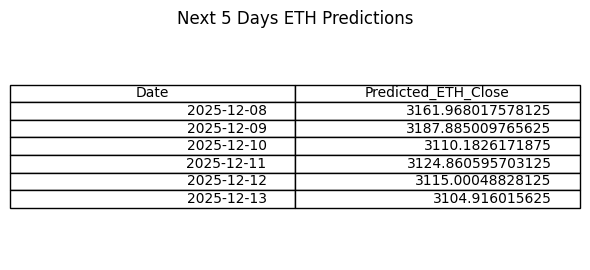

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


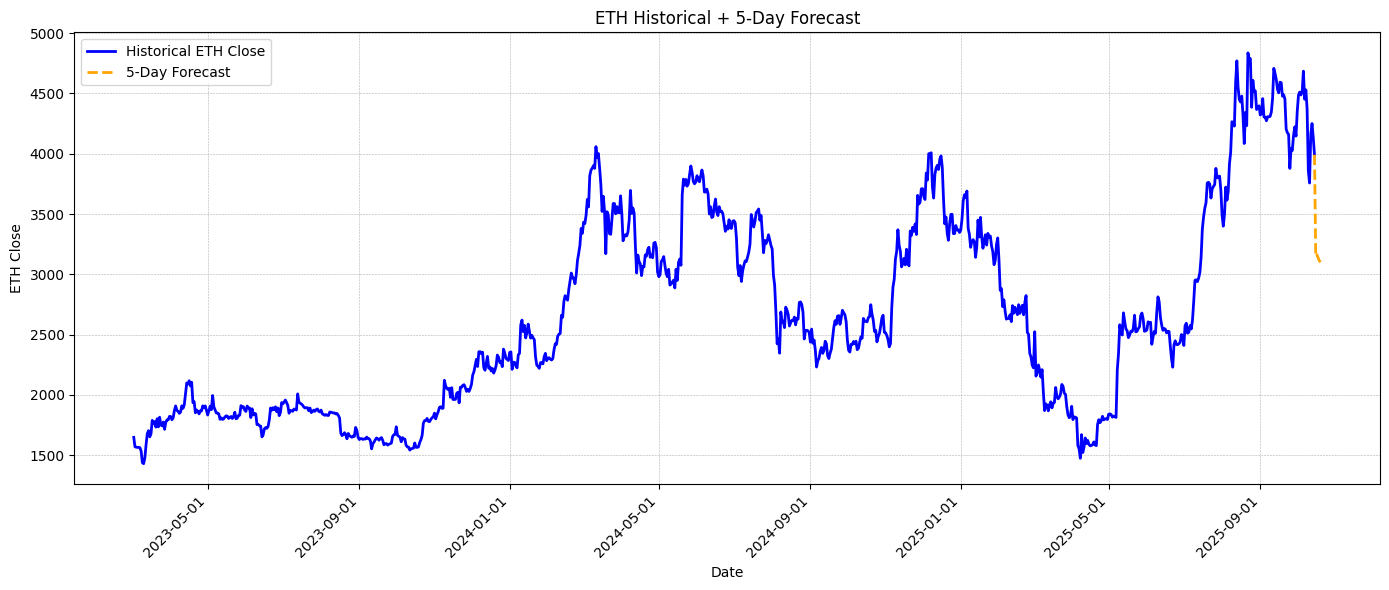

In [49]:


# 3. LOAD DATA
eth_df = pd.read_csv(ETH_FILE)
daily_news = pd.read_csv(NEWS_FILE)

eth_df["date"] = pd.to_datetime(eth_df["date"], errors="coerce")
daily_news["date"] = pd.to_datetime(daily_news["date"], errors="coerce")

start_date = pd.to_datetime("2023-01-12")
end_date = pd.to_datetime("2025-12-31")  # extend to end of December

eth_df = eth_df[(eth_df["date"] >= start_date) & (eth_df["date"] <= end_date)].copy()
daily_news = daily_news[(daily_news["date"] >= start_date) & (daily_news["date"] <= end_date)].copy()

eth_df = eth_df.sort_values("date").reset_index(drop=True)
daily_news = daily_news.sort_values("date").reset_index(drop=True)

# Merge
df = pd.merge(eth_df, daily_news, on="date", how="left")
df["news_count"] = df["news_count"].fillna(0)
df["mean_sentiment"] = df["mean_sentiment"].fillna(0)

# 4. TECHNICAL INDICATORS
df["rsi"] = ta.momentum.RSIIndicator(close=df["eth_close"], window=14).rsi()
macd = ta.trend.MACD(close=df["eth_close"])
df["macd"] = macd.macd()
df["macd_signal"] = macd.macd_signal()
df["macd_diff"] = macd.macd_diff()
df["sma_20"] = df["eth_close"].rolling(20).mean()
df["sma_50"] = df["eth_close"].rolling(50).mean()
bb = ta.volatility.BollingerBands(close=df["eth_close"], window=20, window_dev=2)
df["bb_upper"] = bb.bollinger_hband()
df["bb_lower"] = bb.bollinger_lband()
df["bb_middle"] = bb.bollinger_mavg()

df["target_next_close"] = df["eth_close"].shift(-1)
df = df.dropna().reset_index(drop=True)

# 5. FEATURES + SCALING
features = ["rsi","macd","macd_signal","macd_diff","sma_20","sma_50",
            "bb_upper","bb_lower","bb_middle","news_count","mean_sentiment"]

X = df[features].values
y = df["target_next_close"].values.reshape(-1,1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# 6. FUNCTION TO CREATE SEQUENCES
def create_sequences(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)


# HYPERPARAMETER OPTIONS
# time_steps_list = [10, 20, 30]
# lstm_units_list = [32, 64, 128]
# dropout_list = [0.1, 0.2, 0.3]
# batch_size_list = [16, 32]
# epochs_list = [50, 100]
# learning_rate_list = [0.001, 0.0005]

# 7. HYPERPARAMETERS
time_steps_list = [10]
lstm_units_list = [32]
dropout_list = [0.1]
batch_size_list = [8]
epochs_list = [50]
learning_rate_list = [0.01]

# 8. TRAIN & SEARCH BEST MODEL
results = []
best_rmse = np.inf
best_model = None
best_X_test, best_y_test, best_y_pred = None, None, None

for time_steps in time_steps_list:
    X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)
    train_size = int(len(X_seq)*0.8)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]
    
    for lstm_units in lstm_units_list:
        for dropout_rate in dropout_list:
            for batch_size in batch_size_list:
                for epochs in epochs_list:
                    for lr in learning_rate_list:
                        model = Sequential()
                        model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
                        model.add(Dropout(dropout_rate))
                        model.add(Dense(1))
                        model.compile(optimizer=Adam(learning_rate=lr), loss="mse")
                        
                        history = model.fit(
                            X_train, y_train,
                            validation_split=0.1,
                            epochs=epochs,
                            batch_size=batch_size,
                            verbose=0,
                            shuffle=False
                        )
                        
                        y_pred_scaled = model.predict(X_test)
                        y_pred = scaler_y.inverse_transform(y_pred_scaled)
                        y_test_actual = scaler_y.inverse_transform(y_test)
                        
                        rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
                        r2 = r2_score(y_test_actual, y_pred)
                        
                        results.append({
                            "time_steps": time_steps,
                            "lstm_units": lstm_units,
                            "dropout": dropout_rate,
                            "batch_size": batch_size,
                            "epochs": epochs,
                            "learning_rate": lr,
                            "RMSE": rmse,
                            "R2": r2
                        })
                        
                        print(f"Done: time_steps={time_steps}, units={lstm_units}, dropout={dropout_rate}, batch={batch_size}, epochs={epochs}, lr={lr} | RMSE={rmse:.2f}, R2={r2:.4f}")
                        
                        if rmse < best_rmse:
                            best_rmse = rmse
                            best_model = model
                            best_X_test = X_test
                            best_y_test = y_test_actual
                            best_y_pred = y_pred

# 9. SAVE RESULTS + MODEL
results_df = pd.DataFrame(results)
results_df.to_csv(OUTPUT_TABLES / "lstm_hyperparameter_results.csv", index=False)
best_model.save(MODEL_DIR / "best_lstm_model.h5")

# 10. PLOT BEST MODEL PREDICTION
plt.figure(figsize=(14,6))
plt.plot(best_y_test, label="Actual Price", color="blue")
plt.plot(best_y_pred, label="Predicted Price", color="red", linestyle="--")
plt.title(f"Best LSTM Model Prediction (RMSE={best_rmse:.2f})")
plt.xlabel("Time Index")
plt.ylabel("ETH Closing Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(OUTPUT_FIGS / "best_model_prediction.png")
plt.show()

# 11. NEXT 5 DAYS PREDICTION (INCLUDING TODAY)
n_future_days = 5
last_sequence = X_scaled[-time_steps_list[0]:].copy()
future_preds = []

seq = last_sequence.copy()
for i in range(n_future_days + 1):
    next_scaled = best_model.predict(seq.reshape(1, time_steps_list[0], X_scaled.shape[1]))
    next_price = scaler_y.inverse_transform(next_scaled)[0, 0]
    future_preds.append(next_price)
    
    # slide sequence with predicted price in first feature (eth_close)
    new_row = seq[-1].copy()
    new_row[0] = next_scaled  # replace eth_close feature with predicted scaled value
    seq = np.vstack([seq[1:], new_row])

future_dates = [datetime.today().date() + timedelta(days=i) for i in range(n_future_days + 1)]
pred_df = pd.DataFrame({"Date": future_dates, "Predicted_ETH_Close": future_preds})
print("\nNext 5 Days ETH Predictions:\n")
print(pred_df)
pred_df.to_csv(OUTPUT_TABLES / "next_5_days_eth_predictions.csv", index=False)

# 12. PLOT NEXT 5 DAYS TABLE
fig, ax = plt.subplots(figsize=(6, 1 + len(pred_df)*0.3))
ax.axis('off')
ax.table(cellText=pred_df.values, colLabels=pred_df.columns, loc='center')
plt.title("Next 5 Days ETH Predictions")
plt.tight_layout()
plt.savefig(OUTPUT_FIGS / "next_5_days_table.png")
plt.show()

# 13. PLOT HISTORICAL + FUTURE FORECAST
future_seq = X_scaled[-time_steps_list[0]:].copy()
pred_future_scaled = []

for _ in range(n_future_days):
    next_pred_scaled = best_model.predict(future_seq.reshape(1, time_steps_list[0], X_scaled.shape[1]))
    pred_future_scaled.append(next_pred_scaled[0,0])
    future_seq = np.vstack([future_seq[1:], future_seq[-1]])

pred_future = scaler_y.inverse_transform(np.array(pred_future_scaled).reshape(-1,1))
future_dates_plot = pd.date_range(start=df["date"].iloc[-1]+pd.Timedelta(days=1), periods=n_future_days)

plt.figure(figsize=(14,6))
plt.plot(df["date"], df["eth_close"], color="blue", label="Historical ETH Close", linewidth=2)
plt.plot(future_dates_plot, pred_future, color="orange", linestyle="--", linewidth=2, label="5-Day Forecast")
plt.plot([df["date"].iloc[-1], future_dates_plot[0]],
         [df["eth_close"].iloc[-1], pred_future[0][0]], color="orange", linestyle="--", linewidth=2)

plt.grid(which='major', linestyle='--', linewidth=0.4)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')
plt.title("ETH Historical + 5-Day Forecast")
plt.xlabel("Date")
plt.ylabel("ETH Close")
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_FIGS / "historical_plus_5day_forecast.png")
plt.show()


c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/50, Train Loss: 0.1433
Epoch 10/50, Train Loss: 0.0337
Epoch 20/50, Train Loss: 0.0254
Epoch 30/50, Train Loss: 0.0224
Epoch 40/50, Train Loss: 0.0196
Epoch 50/50, Train Loss: 0.0213
Model saved to C:\Users\moham\Downloads\scrape\main\crypto_project\models\transformer_eth_model.pth
Transformer Results: RMSE=142.32, R2=0.9671


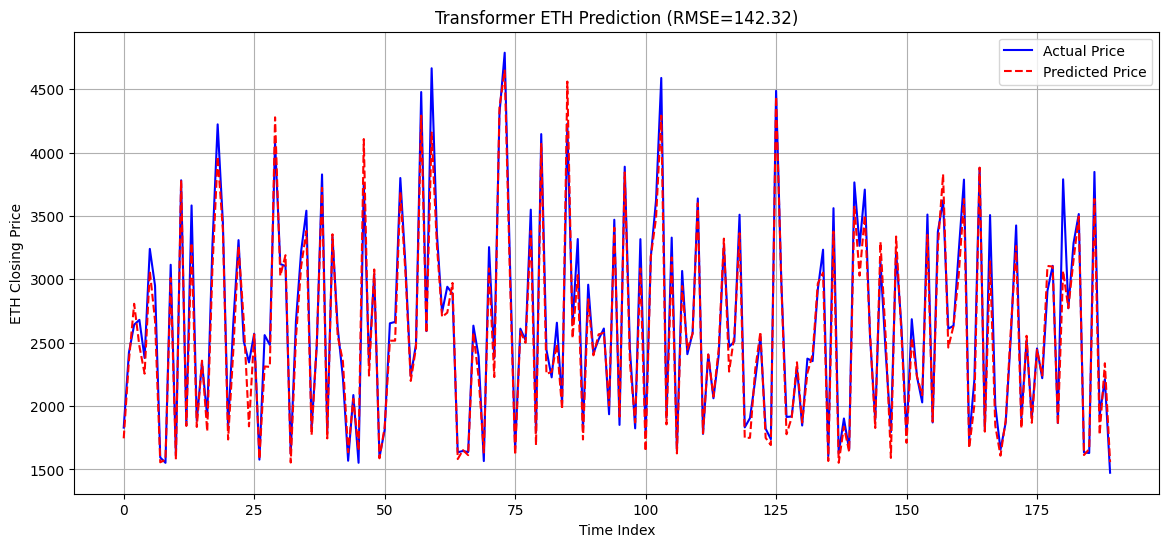

5-day forecast saved to C:\Users\moham\Downloads\scrape\main\crypto_project\outputs\tables\transformer_5day_forecast.csv


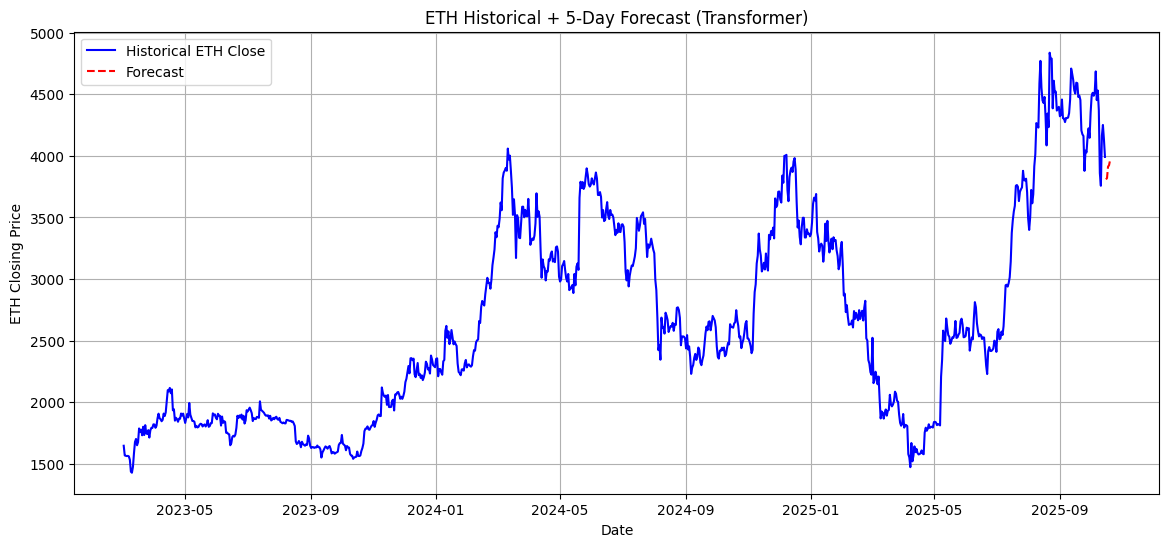

ETH Closing Price: Today + Next 5 Days
{'2025-10-15': np.float64(3990.9),
 '2025-10-16': np.float32(3808.67),
 '2025-10-17': np.float32(3819.41),
 '2025-10-18': np.float32(3911.74),
 '2025-10-19': np.float32(3924.05),
 '2025-10-20': np.float32(3965.73)}


In [47]:


# 3. LOAD DATA
eth_df = pd.read_csv(ETH_FILE)
news_df = pd.read_csv(NEWS_FILE)

eth_df["date"] = pd.to_datetime(eth_df["date"], errors="coerce")
news_df["date"] = pd.to_datetime(news_df["date"], errors="coerce")

start_date = pd.to_datetime("2023-01-12")
end_date = pd.to_datetime("2025-10-16")

eth_df = eth_df[(eth_df["date"] >= start_date) & (eth_df["date"] <= end_date)].copy()
news_df = news_df[(news_df["date"] >= start_date) & (news_df["date"] <= end_date)].copy()

eth_df = eth_df.sort_values("date").reset_index(drop=True)
news_df = news_df.sort_values("date").reset_index(drop=True)

# 4. MERGE
df = pd.merge(eth_df, news_df, on="date", how="left")
df["news_count"] = df["news_count"].fillna(0)
df["mean_sentiment"] = df["mean_sentiment"].fillna(0)

# 5. TECHNICAL INDICATORS
df["rsi"] = ta.momentum.RSIIndicator(close=df["eth_close"], window=14).rsi()
macd = ta.trend.MACD(close=df["eth_close"])
df["macd"] = macd.macd()
df["macd_signal"] = macd.macd_signal()
df["macd_diff"] = macd.macd_diff()
df["sma_20"] = df["eth_close"].rolling(20).mean()
df["sma_50"] = df["eth_close"].rolling(50).mean()
bb = ta.volatility.BollingerBands(close=df["eth_close"], window=20, window_dev=2)
df["bb_upper"] = bb.bollinger_hband()
df["bb_lower"] = bb.bollinger_lband()
df["bb_middle"] = bb.bollinger_mavg()

df["target_next_close"] = df["eth_close"].shift(-1)
df = df.dropna().reset_index(drop=True)

# 6. FEATURES + SCALING
features = ["rsi","macd","macd_signal","macd_diff","sma_20","sma_50",
            "bb_upper","bb_lower","bb_middle","news_count","mean_sentiment"]

X = df[features].values
y = df["target_next_close"].values.reshape(-1,1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# 7. CREATE SEQUENCES
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_len=10):
        self.X, self.y = X, y
        self.seq_len = seq_len

    def __len__(self):
        return len(self.X) - self.seq_len

    def __getitem__(self, idx):
        x_seq = self.X[idx:idx+self.seq_len]
        y_seq = self.y[idx+self.seq_len]
        return torch.tensor(x_seq, dtype=torch.float32), torch.tensor(y_seq, dtype=torch.float32)

seq_len = 10
dataset = TimeSeriesDataset(X_scaled, y_scaled, seq_len)
train_size = int(len(dataset)*0.8)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset)-train_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# 8. DEFINE TRANSFORMER MODEL
class TransformerPredictor(nn.Module):
    def __init__(self, feature_size, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.input_proj = nn.Linear(feature_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.input_proj(x)  # [batch, seq_len, d_model]
        x = x.permute(1,0,2)    # [seq_len, batch, d_model] for Transformer
        x = self.transformer_encoder(x)
        x = x[-1,:,:]           # last time step
        out = self.decoder(x)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerPredictor(feature_size=X_scaled.shape[1]).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 9. TRAIN
epochs = 50
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*x_batch.size(0)
    train_loss /= len(train_loader.dataset)
    if (epoch+1)%10==0 or epoch==0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}")

# Save model
torch.save(model.state_dict(), MODEL_DIR / "transformer_eth_model.pth")
print("Model saved to", MODEL_DIR / "transformer_eth_model.pth")

# 10. TEST
model.eval()
y_preds, y_trues = [], []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = model(x_batch)
        y_preds.append(y_pred.cpu().numpy())
        y_trues.append(y_batch.cpu().numpy())

y_pred_scaled = np.vstack(y_preds)
y_test_scaled = np.vstack(y_trues)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)
print(f"Transformer Results: RMSE={rmse:.2f}, R2={r2:.4f}")

# 11. PLOT TEST PREDICTION
plt.figure(figsize=(14,6))
plt.plot(y_test_actual, label="Actual Price", color="blue")
plt.plot(y_pred, label="Predicted Price", color="red", linestyle="--")
plt.title(f"Transformer ETH Prediction (RMSE={rmse:.2f})")
plt.xlabel("Time Index")
plt.ylabel("ETH Closing Price")
plt.legend()
plt.grid(True)
plt.savefig(OUTPUT_FIGS / "transformer_test_prediction.png")
plt.show()

# 12. FUTURE 5-DAY PREDICTION
model.eval()
last_seq = torch.tensor(X_scaled[-seq_len:], dtype=torch.float32).unsqueeze(0).to(device)
future_preds_scaled = []

for _ in range(5):
    with torch.no_grad():
        pred = model(last_seq)
        future_preds_scaled.append(pred.cpu().numpy())
    # slide window
    new_row = last_seq[0,1:,:].clone()
    new_feature = last_seq[0,-1,:].clone()
    last_seq = torch.cat([new_row.unsqueeze(0), new_feature.unsqueeze(0).unsqueeze(0)], dim=1)

future_preds = scaler_y.inverse_transform(np.vstack(future_preds_scaled))
future_dates = pd.date_range(start=df["date"].iloc[-1] + timedelta(days=1), periods=5)

future_df = pd.DataFrame({"date": future_dates, "predicted_close": future_preds.flatten()})
future_df.to_csv(OUTPUT_TABLES / "transformer_5day_forecast.csv", index=False)
print("5-day forecast saved to", OUTPUT_TABLES / "transformer_5day_forecast.csv")

# 13. PLOT HISTORICAL + FUTURE
plt.figure(figsize=(14,6))
plt.plot(df["date"], df["eth_close"], label="Historical ETH Close", color="blue")
plt.plot(future_df["date"], future_df["predicted_close"], label="Forecast", color="red", linestyle="--")
plt.title("ETH Historical + 5-Day Forecast (Transformer)")
plt.xlabel("Date")
plt.ylabel("ETH Closing Price")
plt.legend()
plt.grid(True)
plt.savefig(OUTPUT_FIGS / "transformer_historical_forecast.png")
plt.show()

# 14. PRINT TODAY + NEXT 5 DAYS FORECAST
today_close = df["eth_close"].iloc[-1]
dates_today_to_5days = pd.date_range(start=df["date"].iloc[-1], periods=6)
prices_today_to_5days = [today_close] + list(future_df["predicted_close"].values)

forecast_dict = {str(date.date()): round(price, 2) for date, price in zip(dates_today_to_5days, prices_today_to_5days)}

print("ETH Closing Price: Today + Next 5 Days")
pprint(forecast_dict)


### New data

Epoch 1/50


c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0304 - val_loss: 0.0656
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0145 - val_loss: 0.0518
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0122 - val_loss: 0.0361
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0105 - val_loss: 0.0320
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0090 - val_loss: 0.0270
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0084 - val_loss: 0.0284
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0082 - val_loss: 0.0294
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0079 - val_loss: 0.0239
Epoch 9/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0073 - val_loss: 0.0163
Epoch 10/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072 - val_loss: 0.0172
Epoch 11/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0072 - val_loss: 0.0206
Epoch 12/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

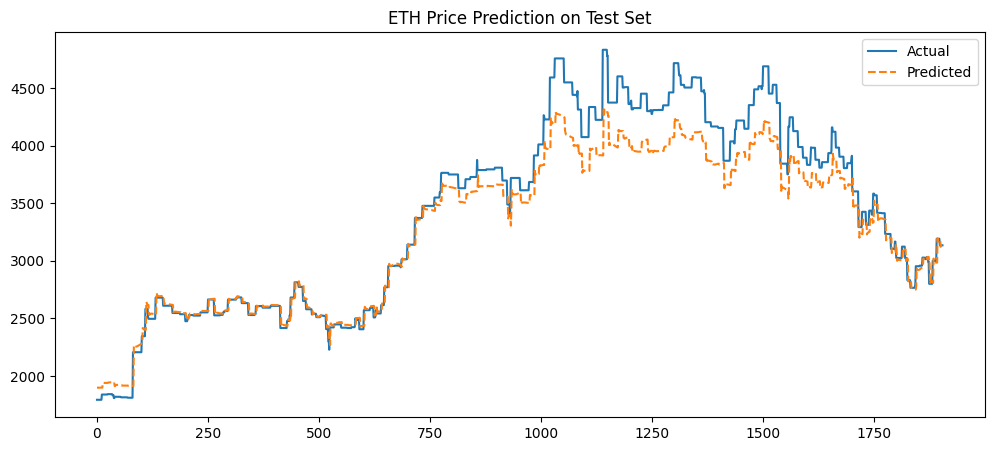

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


,Date,Predicted_Close
0,2025-12-05,3139.591797
1,2025-12-06,3139.315674
2,2025-12-07,3139.246094
3,2025-12-08,3139.389648
4,2025-12-09,3139.488525
5,2025-12-10,3139.541992
6,2025-12-11,3139.561279
7,2025-12-12,3139.567871


,date,title,price_up
9513,2025-12-02,Andrometa’s $SHRD Token: Providing AI Agent Cr...,0
9514,2025-12-02,Bybit Ignites the TradeMasters Grand Prix Fina...,0
9515,2025-12-02,Cardano Climbs 10% In Rally,0
9516,2025-12-02,Bitcoin price today: rebounds to $88.5k after ...,0
9517,2025-12-02,Why is Bitcoin still falling? Wall Street anal...,0
9518,2025-12-02,STON.fi’s First Full DAO in TON Ecosystem Is N...,0
9519,2025-12-02,BC.GAME named Exclusive Gaming Partner of Cryp...,1
9520,2025-12-03,DoGeshBhai ($DGBhai): India’s Meme Power Arriv...,0
9521,2025-12-03,"Supra Unveils Hydrangea++, Challenging the Phy...",0
9522,2025-12-03,Bitcoin price today: bounces back to $93k amid...,0


News from December 1st onward that led to price increase next day:


,date,title,price_up
9510,2025-12-01,Cardano Falls 10% In Selloff,1
9519,2025-12-02,BC.GAME named Exclusive Gaming Partner of Cryp...,1


In [83]:
# ============================================================
# 1. IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import ta
from datetime import timedelta
from pathlib import Path

# ============================================================
# 2. DEFINE PATHS
# ============================================================
PROJECT_ROOT = Path(r"C:\Users\moham\Downloads\scrape\main\crypto_project")
ETH_FILE = PROJECT_ROOT / "data" / "raw" / "eth_usd_daily.csv"
NEWS_FILE = PROJECT_ROOT / "data" / "raw" / "investing_news_crypto_data.csv"
OUTPUT_FIGS = PROJECT_ROOT / "outputs" / "figures"
OUTPUT_TABLES = PROJECT_ROOT / "outputs" / "tables"

OUTPUT_FIGS.mkdir(parents=True, exist_ok=True)
OUTPUT_TABLES.mkdir(parents=True, exist_ok=True)

# ============================================================
# 3. LOAD DATA
# ============================================================
# ETH CSV has extra header row, skip second line
eth_df = pd.read_csv(ETH_FILE, skiprows=1)
eth_df.columns = ['date','close','high','low','open','volume']
eth_df['date'] = pd.to_datetime(eth_df['date'], format='%d-%m-%Y')

news_df = pd.read_csv(NEWS_FILE)
news_df.columns = [c.lower() for c in news_df.columns]
# Extract only date part from news
news_df['date'] = pd.to_datetime(news_df['date'].str.split(' ').str[0], format='%d-%m-%Y')

# ============================================================
# 4. MERGE DATA
# ============================================================
# Merge ETH with news (left join on date)
merged_df = pd.merge(eth_df, news_df, on='date', how='left')

# Fill missing news info
merged_df['title'] = merged_df['title'].fillna('No news')
merged_df['description'] = merged_df['description'].fillna('')
merged_df['url'] = merged_df['url'].fillna('')

# ============================================================
# 5. COMPUTE SIMPLE TECHNICAL INDICATORS
# ============================================================
merged_df['rsi'] = ta.momentum.RSIIndicator(close=merged_df['close'], window=14).rsi()
merged_df['sma_20'] = merged_df['close'].rolling(20).mean()
merged_df['sma_50'] = merged_df['close'].rolling(50).mean()
merged_df['target_next_close'] = merged_df['close'].shift(-1)
merged_df = merged_df.dropna().reset_index(drop=True)

# ============================================================
# 6. PREPARE FEATURES
# ============================================================
features = ['close','rsi','sma_20','sma_50']
X = merged_df[features].values
y = merged_df['target_next_close'].values.reshape(-1,1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# ============================================================
# 7. CREATE SEQUENCES
# ============================================================
def create_sequences(X, y, time_steps=8):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 8
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# Train/test split
train_size = int(len(X_seq)*0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# ============================================================
# 8. BUILD AND TRAIN LSTM
# ============================================================
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, shuffle=False)

# ============================================================
# 9. EVALUATE
# ============================================================
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)
print(f"LSTM Results: RMSE={rmse:.2f}, R2={r2:.4f}")

plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('ETH Price Prediction on Test Set')
plt.show()

# ============================================================
# 10. PREDICT NEXT 5 DAYS
# ============================================================
n_future_days = 8
future_preds = []
last_seq = X_scaled[-time_steps:].copy()

for i in range(n_future_days):
    next_scaled = model.predict(last_seq.reshape(1, time_steps, X_scaled.shape[1]))
    next_price = scaler_y.inverse_transform(next_scaled)[0,0]
    future_preds.append(next_price)
    # Move sequence forward
    last_row = last_seq[-1].copy()
    last_seq = np.vstack([last_seq[1:], last_row])

future_dates = [merged_df['date'].iloc[-1] + timedelta(days=i+1) for i in range(n_future_days)]
pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_preds})
display(pred_df)

# ============================================================
# 11. NEWS IMPACT
# ============================================================
# Define simple impact: if next day's close > today => up, else down
merged_df['price_up'] = (merged_df['target_next_close'] > merged_df['close']).astype(int)

# Map each news to next day's price movement
news_impact = merged_df[['date','title','price_up']]
display(news_impact.tail(20))

# Optional: save results
merged_df.to_csv(OUTPUT_TABLES / "merged_eth_news.csv", index=False)
pred_df.to_csv(OUTPUT_TABLES / "eth_next_5_days.csv", index=False)
news_impact.to_csv(OUTPUT_TABLES / "news_impact.csv", index=False)


# ================== NEW: Print only news with price up ==================
# price_up_news = news_impact[news_impact['price_up'] == 1]
# print("News that led to price increase next day:")
# display(price_up_news)

# Filter news from December 1st onward where price went up
start_date = pd.to_datetime("2025-12-01")
price_up_december = news_impact[
    (news_impact['date'] >= start_date) &
    (news_impact['price_up'] == 1)
]

print("News from December 1st onward that led to price increase next day:")
display(price_up_december)



Epoch 1/50


c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0503 - val_loss: 0.1001
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0180 - val_loss: 0.0688
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0144 - val_loss: 0.0723
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0129 - val_loss: 0.0642
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0115 - val_loss: 0.0633
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0095 - val_loss: 0.0536
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - val_loss: 0.0506
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0085 - val_loss: 0.0641
Epoch 9/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091 - val_loss: 0.0518
Epoch 10/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0085 - val_loss: 0.0529
Epoch 11/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - val_loss: 0.0587
Epoch 12/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

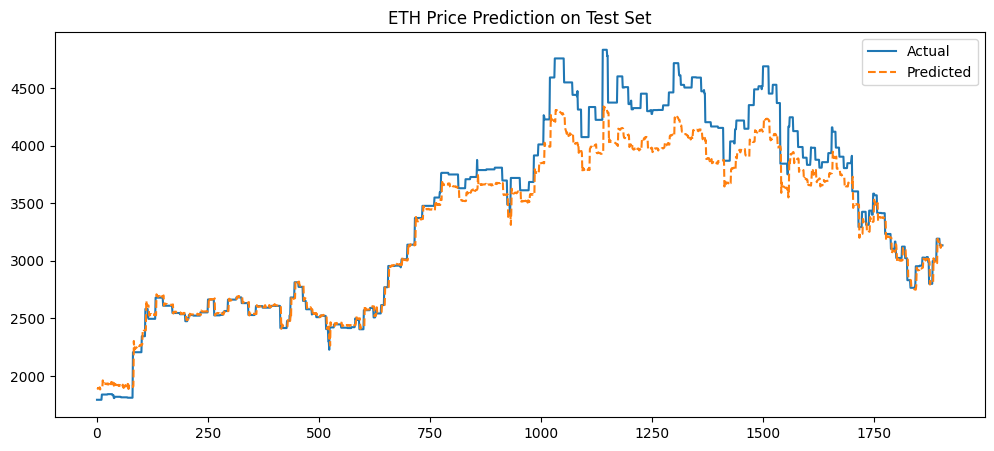

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


,Date,Predicted_Close
0,2025-12-05,3148.631348
1,2025-12-06,3152.405518
2,2025-12-07,3155.362305
3,2025-12-08,3157.246094
4,2025-12-09,3158.860107


,date,title,price_up
9513,2025-12-02,Andrometa’s $SHRD Token: Providing AI Agent Cr...,0
9514,2025-12-02,Bybit Ignites the TradeMasters Grand Prix Fina...,0
9515,2025-12-02,Cardano Climbs 10% In Rally,0
9516,2025-12-02,Bitcoin price today: rebounds to $88.5k after ...,0
9517,2025-12-02,Why is Bitcoin still falling? Wall Street anal...,0
9518,2025-12-02,STON.fi’s First Full DAO in TON Ecosystem Is N...,0
9519,2025-12-02,BC.GAME named Exclusive Gaming Partner of Cryp...,1
9520,2025-12-03,DoGeshBhai ($DGBhai): India’s Meme Power Arriv...,0
9521,2025-12-03,"Supra Unveils Hydrangea++, Challenging the Phy...",0
9522,2025-12-03,Bitcoin price today: bounces back to $93k amid...,0


News from December 1st onward that led to price increase next day:


,date,title,price_up
9510,2025-12-01,Cardano Falls 10% In Selloff,1
9519,2025-12-02,BC.GAME named Exclusive Gaming Partner of Cryp...,1


In [86]:
# ============================================================
# 1. IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import ta
from textblob import TextBlob
from datetime import timedelta
from pathlib import Path

# ============================================================
# 2. DEFINE PATHS
# ============================================================
PROJECT_ROOT = Path(r"C:\Users\moham\Downloads\scrape\main\crypto_project")
ETH_FILE = PROJECT_ROOT / "data" / "raw" / "eth_usd_daily.csv"
NEWS_FILE = PROJECT_ROOT / "data" / "raw" / "investing_news_crypto_data.csv"
OUTPUT_FIGS = PROJECT_ROOT / "outputs" / "figures"
OUTPUT_TABLES = PROJECT_ROOT / "outputs" / "tables"

OUTPUT_FIGS.mkdir(parents=True, exist_ok=True)
OUTPUT_TABLES.mkdir(parents=True, exist_ok=True)

# ============================================================
# 3. LOAD DATA
# ============================================================
eth_df = pd.read_csv(ETH_FILE, skiprows=1)
eth_df.columns = ['date','close','high','low','open','volume']
eth_df['date'] = pd.to_datetime(eth_df['date'], format='%d-%m-%Y')

news_df = pd.read_csv(NEWS_FILE)
news_df.columns = [c.lower() for c in news_df.columns]
# Extract only date part from news
news_df['date'] = pd.to_datetime(news_df['date'].str.split(' ').str[0], format='%d-%m-%Y')

# ============================================================
# 4. MERGE DATA
# ============================================================
merged_df = pd.merge(eth_df, news_df, on='date', how='left')
merged_df['title'] = merged_df['title'].fillna('No news')
merged_df['description'] = merged_df['description'].fillna('')
merged_df['url'] = merged_df['url'].fillna('')

# ============================================================
# 5. COMPUTE TECHNICAL INDICATORS
# ============================================================
merged_df['rsi'] = ta.momentum.RSIIndicator(close=merged_df['close'], window=14).rsi()
merged_df['sma_20'] = merged_df['close'].rolling(20).mean()
merged_df['sma_50'] = merged_df['close'].rolling(50).mean()
merged_df['target_next_close'] = merged_df['close'].shift(-1)
merged_df = merged_df.dropna().reset_index(drop=True)

# ============================================================
# 6. COMPUTE NEWS SENTIMENT (TITLE ONLY)
# ============================================================
merged_df['sentiment_polarity'] = merged_df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
merged_df['sentiment_subjectivity'] = merged_df['title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# ============================================================
# 7. PREPARE FEATURES
# ============================================================
features = ['close','rsi','sma_20','sma_50','sentiment_polarity','sentiment_subjectivity']
X = merged_df[features].values
y = merged_df['target_next_close'].values.reshape(-1,1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# ============================================================
# 8. CREATE SEQUENCES
# ============================================================
def create_sequences(X, y, time_steps=8):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 8
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

train_size = int(len(X_seq)*0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# ============================================================
# 9. BUILD AND TRAIN LSTM
# ============================================================
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, shuffle=False)

# ============================================================
# 10. EVALUATE
# ============================================================
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)
print(f"LSTM Results with News Sentiment: RMSE={rmse:.2f}, R2={r2:.4f}")

plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('ETH Price Prediction on Test Set')
plt.show()

# ============================================================
# 11. PREDICT NEXT 5 DAYS
# ============================================================
n_future_days = 5
future_preds = []
last_seq = X_scaled[-time_steps:].copy()

for i in range(n_future_days):
    next_scaled = model.predict(last_seq.reshape(1, time_steps, X_scaled.shape[1]))
    next_price = scaler_y.inverse_transform(next_scaled)[0,0]
    future_preds.append(next_price)
    last_row = last_seq[-1].copy()
    last_seq = np.vstack([last_seq[1:], last_row])

future_dates = [merged_df['date'].iloc[-1] + timedelta(days=i+1) for i in range(n_future_days)]
pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_preds})
display(pred_df)

# ============================================================
# 12. NEWS IMPACT
# ============================================================
merged_df['price_up'] = (merged_df['target_next_close'] > merged_df['close']).astype(int)
news_impact = merged_df[['date','title','price_up']]
display(news_impact.tail(20))

# ============================================================
# 13. SAVE OUTPUTS
# ============================================================
merged_df.to_csv(OUTPUT_TABLES / "merged_eth_news_sentiment.csv", index=False)
pred_df.to_csv(OUTPUT_TABLES / "eth_next_5_days_sentiment.csv", index=False)
news_impact.to_csv(OUTPUT_TABLES / "news_impact_sentiment.csv", index=False)


# Filter news from December 1st onward where price went up
start_date = pd.to_datetime("2025-12-01")
price_up_december = news_impact[
    (news_impact['date'] >= start_date) &
    (news_impact['price_up'] == 1)
]

print("News from December 1st onward that led to price increase next day:")
display(price_up_december)



Training model 1/3...
Training model 2/3...
Training model 3/3...
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Ensemble LSTM Results: RMSE=382.91, R2=0.7828


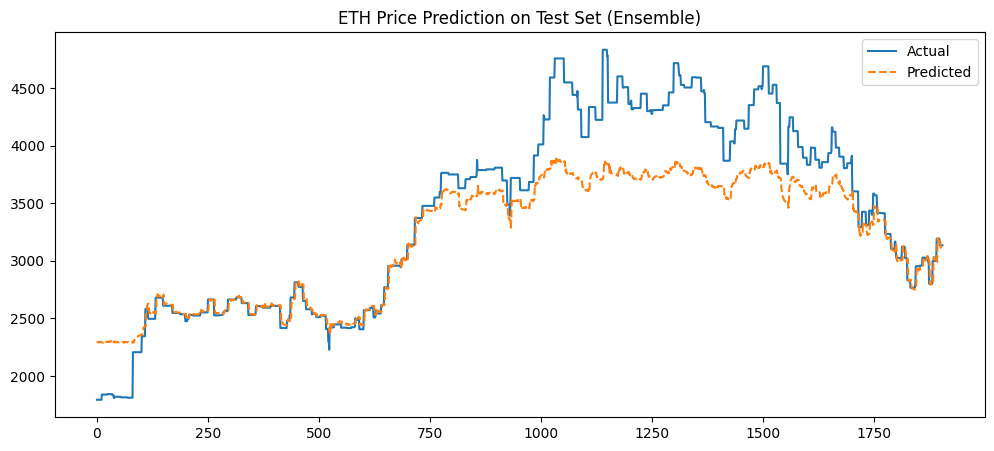

C:\Users\moham\AppData\Local\Temp\ipykernel_10936\1430904443.py:156: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = next_scaled  # Update only the 'close' column with predicted value
C:\Users\moham\AppData\Local\Temp\ipykernel_10936\1430904443.py:156: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_row[0] = next_scaled  # Update only the 'close' column with predicted value
C:\Users\moham\AppData\Local\Temp\ipykernel_10936\1430904443.py:156: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this op

,Date,Predicted_Close
0,2025-12-05,3163.643799
1,2025-12-06,3199.537109
2,2025-12-07,3240.334961
3,2025-12-08,3283.023926
4,2025-12-09,3323.681885


,date,title,price_up
9513,2025-12-02,Andrometa’s $SHRD Token: Providing AI Agent Cr...,0
9514,2025-12-02,Bybit Ignites the TradeMasters Grand Prix Fina...,0
9515,2025-12-02,Cardano Climbs 10% In Rally,0
9516,2025-12-02,Bitcoin price today: rebounds to $88.5k after ...,0
9517,2025-12-02,Why is Bitcoin still falling? Wall Street anal...,0
9518,2025-12-02,STON.fi’s First Full DAO in TON Ecosystem Is N...,0
9519,2025-12-02,BC.GAME named Exclusive Gaming Partner of Cryp...,1
9520,2025-12-03,DoGeshBhai ($DGBhai): India’s Meme Power Arriv...,0
9521,2025-12-03,"Supra Unveils Hydrangea++, Challenging the Phy...",0
9522,2025-12-03,Bitcoin price today: bounces back to $93k amid...,0


In [22]:
# ============================================================
# 1. IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from datetime import timedelta
from pathlib import Path
import ta
from textblob import TextBlob

# ============================================================
# 2. DEFINE PATHS
# ============================================================
PROJECT_ROOT = Path(r"C:\Users\moham\Downloads\scrape\main\crypto_project")
ETH_FILE = PROJECT_ROOT / "data" / "raw" / "eth_usd_daily.csv"
NEWS_FILE = PROJECT_ROOT / "data" / "raw" / "investing_news_crypto_data.csv"
OUTPUT_FIGS = PROJECT_ROOT / "outputs" / "figures"
OUTPUT_TABLES = PROJECT_ROOT / "outputs" / "tables"

OUTPUT_FIGS.mkdir(parents=True, exist_ok=True)
OUTPUT_TABLES.mkdir(parents=True, exist_ok=True)

# ============================================================
# 3. LOAD DATA
# ============================================================
eth_df = pd.read_csv(ETH_FILE, skiprows=1)
eth_df.columns = ['date','close','high','low','open','volume']
eth_df['date'] = pd.to_datetime(eth_df['date'], format='%d-%m-%Y')

news_df = pd.read_csv(NEWS_FILE)
news_df.columns = [c.lower() for c in news_df.columns]
news_df['date'] = pd.to_datetime(news_df['date'].str.split(' ').str[0], format='%d-%m-%Y')

# ============================================================
# 4. MERGE DATA
# ============================================================
merged_df = pd.merge(eth_df, news_df, on='date', how='left')
merged_df['title'] = merged_df['title'].fillna('No news')
merged_df['description'] = merged_df['description'].fillna('')
merged_df['url'] = merged_df['url'].fillna('')

# ============================================================
# 5. COMPUTE TECHNICAL INDICATORS
# ============================================================
merged_df['rsi'] = ta.momentum.RSIIndicator(close=merged_df['close'], window=14).rsi()
merged_df['sma_20'] = merged_df['close'].rolling(20).mean()
merged_df['sma_50'] = merged_df['close'].rolling(50).mean()
merged_df['target_next_close'] = merged_df['close'].shift(-1)
merged_df = merged_df.dropna().reset_index(drop=True)

# ============================================================
# 6. COMPUTE NEWS SENTIMENT
# ============================================================
merged_df['sentiment_polarity'] = merged_df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
merged_df['sentiment_subjectivity'] = merged_df['title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# ============================================================
# 7. PREPARE FEATURES
# ============================================================
features = ['close','rsi','sma_20','sma_50','sentiment_polarity','sentiment_subjectivity']
X = merged_df[features].values
y = merged_df['target_next_close'].values.reshape(-1,1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# ============================================================
# 8. CREATE SEQUENCES
# ============================================================
def create_sequences(X, y, time_steps=8):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 8
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

train_size = int(len(X_seq)*0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# ============================================================
# 9. DEFINE FUNCTION TO BUILD ORIGINAL LSTM
# ============================================================
def build_lstm(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# ============================================================
# 10. TRAIN ENSEMBLE
# ============================================================
ensemble_size = 3
models = []
for i in range(ensemble_size):
    print(f"Training model {i+1}/{ensemble_size}...")
    lstm_model = build_lstm((X_train.shape[1], X_train.shape[2]))
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, shuffle=False, verbose=0)
    models.append(lstm_model)

# ============================================================
# 11. PREDICT WITH ENSEMBLE
# ============================================================
y_preds_scaled = [m.predict(X_test) for m in models]
y_pred_scaled = np.mean(np.array(y_preds_scaled), axis=0)  # average predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)
print(f"Ensemble LSTM Results: RMSE={rmse:.2f}, R2={r2:.4f}")

plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('ETH Price Prediction on Test Set (Ensemble)')
plt.show()

# ============================================================
# 12. PREDICT NEXT 5 DAYS
# ============================================================
n_future_days = 5
future_preds = []

# Start with the last historical sequence
last_seq = X_scaled[-time_steps:].copy()

for i in range(n_future_days):
    # Predict with ensemble
    preds = [m.predict(last_seq.reshape(1, time_steps, X_scaled.shape[1]), verbose=0) for m in models]
    next_scaled = np.mean(np.array(preds), axis=0)
    next_price = scaler_y.inverse_transform(next_scaled)[0,0]
    future_preds.append(next_price)
    
    # Update sequence for next prediction
    new_row = last_seq[-1].copy()
    new_row[0] = next_scaled  # Update only the 'close' column with predicted value
    last_seq = np.vstack([last_seq[1:], new_row])  # Shift sequence and append new row

# Create dataframe of future predictions
future_dates = [merged_df['date'].iloc[-1] + timedelta(days=i+1) for i in range(n_future_days)]
pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_preds})
display(pred_df)


# ============================================================
# 13. NEWS IMPACT
# ============================================================
merged_df['price_up'] = (merged_df['target_next_close'] > merged_df['close']).astype(int)
news_impact = merged_df[['date','title','price_up']]
display(news_impact.tail(20))

# ============================================================
# 14. SAVE OUTPUTS
# ============================================================
# merged_df.to_csv(OUTPUT_TABLES / "merged_eth_news_sentiment.csv", index=False)
# pred_df.to_csv(OUTPUT_TABLES /"eth_next_5_days_sentiment.csv", index=False)
# news_impact.to_csv(OUTPUT_TABLES / "news_impact_sentiment.csv", index=False)


Epoch 1/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0524 - val_loss: 0.1912
Epoch 2/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0278 - val_loss: 0.1632
Epoch 3/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0260 - val_loss: 0.1526
Epoch 4/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0232 - val_loss: 0.1185
Epoch 5/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0218 - val_loss: 0.1080
Epoch 6/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0203 - val_loss: 0.1234
Epoch 7/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0200 - val_loss: 0.1278
Epoch 8/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0191 - val_loss: 0.1323
Epoch 9/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0183 - val_loss: 0.1468
Epoch 10/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0189 - val_loss: 0.1802
Epoch 11/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0185 - val_loss: 0.1989
Epoch 12/50
429/429 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

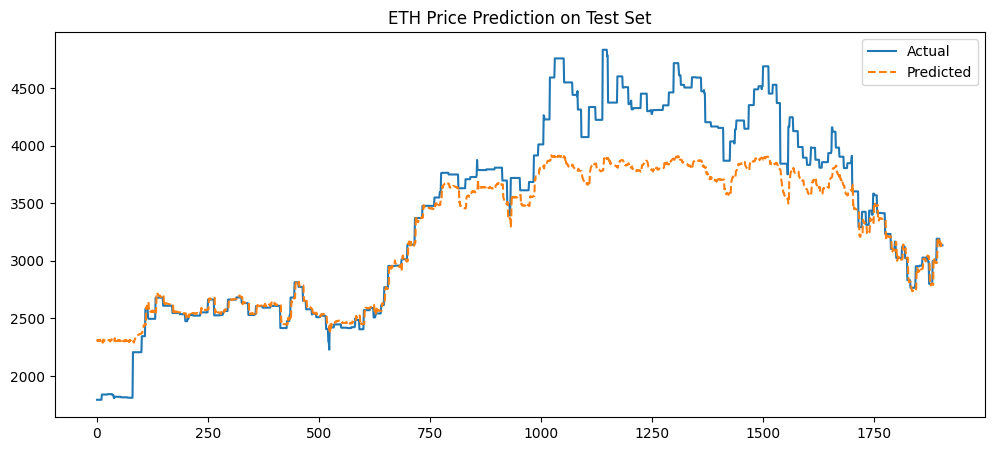

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,Date,Predicted_Close
0,2025-12-05,3179.574219
1,2025-12-06,3189.768311
2,2025-12-07,3196.075928
3,2025-12-08,3195.623047
4,2025-12-09,3194.778320


,date,title,price_up
9513,2025-12-02,Andrometa’s $SHRD Token: Providing AI Agent Cr...,0
9514,2025-12-02,Bybit Ignites the TradeMasters Grand Prix Fina...,0
9515,2025-12-02,Cardano Climbs 10% In Rally,0
9516,2025-12-02,Bitcoin price today: rebounds to $88.5k after ...,0
9517,2025-12-02,Why is Bitcoin still falling? Wall Street anal...,0
9518,2025-12-02,STON.fi’s First Full DAO in TON Ecosystem Is N...,0
9519,2025-12-02,BC.GAME named Exclusive Gaming Partner of Cryp...,1
9520,2025-12-03,DoGeshBhai ($DGBhai): India’s Meme Power Arriv...,0
9521,2025-12-03,"Supra Unveils Hydrangea++, Challenging the Phy...",0
9522,2025-12-03,Bitcoin price today: bounces back to $93k amid...,0


News from December 1st onward that led to price increase next day:


,date,title,price_up
9510,2025-12-01,Cardano Falls 10% In Selloff,1
9519,2025-12-02,BC.GAME named Exclusive Gaming Partner of Cryp...,1


In [18]:
# ============================================================
# 1. IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import ta
from textblob import TextBlob
from datetime import timedelta
from pathlib import Path

# ============================================================
# 2. DEFINE PATHS
# ============================================================
PROJECT_ROOT = Path(r"C:\Users\moham\Downloads\scrape\main\crypto_project")
ETH_FILE = PROJECT_ROOT / "data" / "raw" / "eth_usd_daily.csv"
NEWS_FILE = PROJECT_ROOT / "data" / "raw" / "investing_news_crypto_data.csv"
OUTPUT_FIGS = PROJECT_ROOT / "outputs" / "figures"
OUTPUT_TABLES = PROJECT_ROOT / "outputs" / "tables"

OUTPUT_FIGS.mkdir(parents=True, exist_ok=True)
OUTPUT_TABLES.mkdir(parents=True, exist_ok=True)

# ============================================================
# 3. LOAD DATA
# ============================================================
eth_df = pd.read_csv(ETH_FILE, skiprows=1)
eth_df.columns = ['date','close','high','low','open','volume']
eth_df['date'] = pd.to_datetime(eth_df['date'], format='%d-%m-%Y')

news_df = pd.read_csv(NEWS_FILE)
news_df.columns = [c.lower() for c in news_df.columns]
news_df['date'] = pd.to_datetime(news_df['date'].str.split(' ').str[0], format='%d-%m-%Y')

# ============================================================
# 4. MERGE DATA
# ============================================================
merged_df = pd.merge(eth_df, news_df, on='date', how='left')
merged_df['title'] = merged_df['title'].fillna('No news')
merged_df['description'] = merged_df['description'].fillna('')
merged_df['url'] = merged_df['url'].fillna('')

# ============================================================
# 5. COMPUTE TECHNICAL INDICATORS
# ============================================================
merged_df['rsi'] = ta.momentum.RSIIndicator(close=merged_df['close'], window=14).rsi()
merged_df['sma_20'] = merged_df['close'].rolling(20).mean()
merged_df['sma_50'] = merged_df['close'].rolling(50).mean()
merged_df['target_next_close'] = merged_df['close'].shift(-1)
merged_df = merged_df.dropna().reset_index(drop=True)

# ============================================================
# 6. COMPUTE NEWS SENTIMENT (TITLE ONLY)
# ============================================================
merged_df['sentiment_polarity'] = merged_df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
merged_df['sentiment_subjectivity'] = merged_df['title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# ============================================================
# 7. PREPARE FEATURES
# ============================================================
features = ['close','rsi','sma_20','sma_50','sentiment_polarity','sentiment_subjectivity']
X = merged_df[features].values
y = merged_df['target_next_close'].values.reshape(-1,1)

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# ============================================================
# 8. CREATE SEQUENCES
# ============================================================
def create_sequences(X, y, time_steps=8):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 8
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

train_size = int(len(X_seq)*0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# ============================================================
# 9. BUILD AND TRAIN LSTM (YOUR NEW MODEL)
# ============================================================
model = Sequential()

# Input layer
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layers
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile
model.compile(optimizer='adam', loss='mse')

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, shuffle=False)

# ============================================================
# 10. EVALUATE
# ============================================================
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred)
print(f"LSTM Results with News Sentiment: RMSE={rmse:.2f}, R2={r2:.4f}")

plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('ETH Price Prediction on Test Set')
plt.show()

# ============================================================
# 11. PREDICT NEXT 5 DAYS
# ============================================================
n_future_days = 5
future_preds = []
last_seq = X_scaled[-time_steps:].copy()

for i in range(n_future_days):
    next_scaled = model.predict(last_seq.reshape(1, time_steps, X_scaled.shape[1]))
    next_price = scaler_y.inverse_transform(next_scaled)[0,0]
    future_preds.append(next_price)
    # For simplicity, repeat the last row for the next prediction
    last_row = last_seq[-1].copy()
    last_seq = np.vstack([last_seq[1:], last_row])

future_dates = [merged_df['date'].iloc[-1] + timedelta(days=i+1) for i in range(n_future_days)]
pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_preds})
display(pred_df)

# ============================================================
# 12. NEWS IMPACT
# ============================================================
merged_df['price_up'] = (merged_df['target_next_close'] > merged_df['close']).astype(int)
news_impact = merged_df[['date','title','price_up']]
display(news_impact.tail(20))

# ============================================================
# 13. SAVE OUTPUTS
# ============================================================
merged_df.to_csv(OUTPUT_TABLES / "merged_eth_news_sentiment.csv", index=False)
pred_df.to_csv(OUTPUT_TABLES /"eth_next_5_days_sentiment.csv", index=False)
news_impact.to_csv(OUTPUT_TABLES / "news_impact_sentiment.csv", index=False)

# Filter news from December 1st onward where price went up
start_date = pd.to_datetime("2025-12-01")
price_up_december = news_impact[
    (news_impact['date'] >= start_date) &
    (news_impact['price_up'] == 1)
]

print("News from December 1st onward that led to price increase next day:")
display(price_up_december)


Epoch 1/50


c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0469 - val_loss: 0.1020
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0154 - val_loss: 0.0539
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0136 - val_loss: 0.0441
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0103 - val_loss: 0.0354
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0091 - val_loss: 0.0445
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0091 - val_loss: 0.0392
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0087 - val_loss: 0.0457
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0083 - val_loss: 0.0510
Epoch 9/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - val_loss: 0.0464
Epoch 10/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077 - val_loss: 0.0579
Epoch 11/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0081 - val_loss: 0.0603
Epoch 12/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

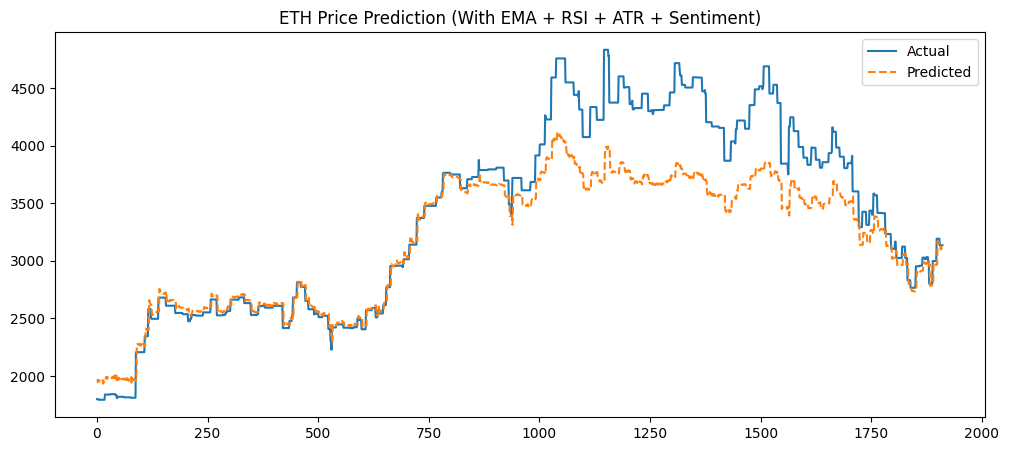

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
        Date  Predicted_Close
0 2025-12-05      3126.821289
1 2025-12-06      3135.489990
2 2025-12-07      3137.265625
3 2025-12-08      3137.471680
4 2025-12-09      3137.513184


In [24]:
# ============================================================
# 1. IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import ta
from textblob import TextBlob
from datetime import timedelta
from pathlib import Path

# ============================================================
# 2. DEFINE PATHS
# ============================================================
PROJECT_ROOT = Path(r"C:\Users\moham\Downloads\scrape\main\crypto_project")

ETH_FILE = PROJECT_ROOT / "data" / "raw" / "eth_usd_daily.csv"
NEWS_FILE = PROJECT_ROOT / "data" / "raw" / "investing_news_crypto_data.csv"

OUTPUT_FIGS = PROJECT_ROOT / "outputs" / "figures"
OUTPUT_TABLES = PROJECT_ROOT / "outputs" / "tables"

OUTPUT_FIGS.mkdir(parents=True, exist_ok=True)
OUTPUT_TABLES.mkdir(parents=True, exist_ok=True)

# ============================================================
# 3. LOAD ETH PRICE DATA
# ============================================================
eth_df = pd.read_csv(ETH_FILE, skiprows=1)
eth_df.columns = ['date','close','high','low','open','volume']
eth_df['date'] = pd.to_datetime(eth_df['date'], format='%d-%m-%Y')
eth_df = eth_df.sort_values("date")

# ============================================================
# 4. LOAD NEWS DATA
# ============================================================
news_df = pd.read_csv(NEWS_FILE)
news_df.columns = [c.lower() for c in news_df.columns]
news_df['date'] = pd.to_datetime(news_df['date'].str.split(' ').str[0], format='%d-%m-%Y')

# ============================================================
# 5. MERGE DATA
# ============================================================
merged_df = pd.merge(eth_df, news_df, on='date', how='left')
merged_df['title'] = merged_df['title'].fillna('No news')
merged_df['description'] = merged_df['description'].fillna('')
merged_df['url'] = merged_df['url'].fillna('')

# ============================================================
# 6. SENTIMENT ANALYSIS
# ============================================================
merged_df['sentiment_polarity'] = merged_df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
merged_df['sentiment_subjectivity'] = merged_df['title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# ============================================================
# 7. ADD REQUESTED TECHNICAL INDICATORS
# ============================================================

# RSI 14
merged_df["rsi_14"] = ta.momentum.RSIIndicator(close=merged_df["close"], window=14).rsi()

# EMA 20, EMA 50, EMA 200
merged_df["ema_20"] = merged_df["close"].ewm(span=20, adjust=False).mean()
merged_df["ema_50"] = merged_df["close"].ewm(span=50, adjust=False).mean()
merged_df["ema_200"] = merged_df["close"].ewm(span=200, adjust=False).mean()

# ATR %
atr = ta.volatility.AverageTrueRange(
    high=merged_df["high"],
    low=merged_df["low"],
    close=merged_df["close"],
    window=14
).average_true_range()

merged_df["atr_pct"] = (atr / merged_df["close"]) * 100

# Target: next-day close
merged_df["target_next_close"] = merged_df["close"].shift(-1)

# Drop NaN rows caused by indicators
merged_df = merged_df.dropna().reset_index(drop=True)

# ============================================================
# 8. SELECT FEATURES
# ============================================================
features = [
    "close",
    "ema_20", "ema_50", "ema_200",
    "rsi_14",
    "atr_pct",
    "sentiment_polarity",
    "sentiment_subjectivity"
]

X = merged_df[features].values
y = merged_df["target_next_close"].values.reshape(-1, 1)

# ============================================================
# 9. SCALING
# ============================================================
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# ============================================================
# 10. SEQUENCE GENERATION
# ============================================================
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# ============================================================
# 11. BUILD LSTM MODEL
# ============================================================
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    shuffle=False
)

# ============================================================
# 12. EVALUATE
# ============================================================
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
r2 = r2_score(y_test_actual, y_pred)

print(f"\n LSTM With EMA + RSI + ATR + Sentiment")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}\n")

# ============================================================
# 13. PLOT RESULTS
# ============================================================
plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title("ETH Price Prediction (With EMA + RSI + ATR + Sentiment)")
plt.savefig(OUTPUT_FIGS / "eth_prediction_indicators.png", dpi=300)
plt.show()

# ============================================================
# 14. FUTURE PREDICTION (NEXT 5 DAYS)
# ============================================================
n_future_days = 5
future_preds = []
last_seq = X_scaled[-time_steps:].copy()

for _ in range(n_future_days):
    future_scaled = model.predict(last_seq.reshape(1, time_steps, X_scaled.shape[1]))
    future_price = scaler_y.inverse_transform(future_scaled)[0,0]
    future_preds.append(future_price)

    last_row = last_seq[-1]
    last_seq = np.vstack([last_seq[1:], last_row])

future_dates = [
    merged_df["date"].iloc[-1] + timedelta(days=i+1)
    for i in range(n_future_days)
]

pred_df = pd.DataFrame({"Date": future_dates, "Predicted_Close": future_preds})
print(pred_df)

# pred_df.to_csv(OUTPUT_TABLES / "future_5day_predictions_indicators.csv", index=False)
